# Rainfall Prediction - Weather Forecasting

#### Problem Statement:

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.  

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:  

a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.  
b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dataset
df_rp=pd.read_csv("weatherAUS.csv")
df_rp

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


Dataset Description:
    
Number of columns: 23  
`Date`  - The date of observation.  
`Location`  -The common name of the location of the weather station.  
`MinTemp`  -The minimum temperature in degrees celsius.  
`MaxTemp` -The maximum temperature in degrees celsius.  
`Rainfall`  -The amount of rainfall recorded for the day in mm.  
`Evaporation`  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am.  
`Sunshine`  -The number of hours of bright sunshine in the day.  
`WindGustDir` - The direction of the strongest wind gust in the 24 hours to midnight.  
`WindGustSpeed` -The speed (km/h) of the strongest wind gust in the 24 hours to midnight.  
`WindDir9am` -Direction of the wind at 9am.  
`WindDir3pm` -Direction of the wind at 3pm.  
`WindSpeed9am` -Wind speed (km/hr) averaged over 10 minutes prior to 9am.  
`WindSpeed3pm` -Wind speed (km/hr) averaged over 10 minutes prior to 3pm.  
`Humidity9am` -Humidity (percent) at 9am.  
`Humidity3pm` -Humidity (percent) at 3pm.  
`Pressure9am` -Atmospheric pressure (hpa) reduced to mean sea level at 9am.  
`Pressure3pm` -Atmospheric pressure (hpa) reduced to mean sea level at 3pm.  
`Cloud9am` - Fraction of sky obscured by cloud at 9am.  
`Cloud3pm` -Fraction of sky obscured by cloud.  
`Temp9am`-Temperature (degrees C) at 9am.  
`Temp3pm` -Temperature (degrees C) at 3pm.  
`RainToday` -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0  
`RainTomorrow` -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

Our target variable for the Regression Model is `RAINFALL`, & the target variable for the Classification Model is `RAINTOMORROW`.

In [3]:
# First 10 rows
df_rp.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [4]:
# Last 10 rows
df_rp.tail(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8415,2017-06-16,Uluru,5.2,24.3,0.0,NaN,NaN,E,24.0,SE,...,53.0,24.0,1023.8,1020.0,NaN,NaN,12.3,23.3,No,No
8416,2017-06-17,Uluru,6.4,23.4,0.0,NaN,NaN,ESE,31.0,S,...,53.0,25.0,1025.8,1023.0,NaN,NaN,11.2,23.1,No,No
8417,2017-06-18,Uluru,8.0,20.7,0.0,NaN,NaN,ESE,41.0,SE,...,56.0,32.0,1028.1,1024.3,NaN,7.0,11.6,20.0,No,No
8418,2017-06-19,Uluru,7.4,20.6,0.0,NaN,NaN,E,35.0,ESE,...,63.0,33.0,1027.2,1023.3,NaN,NaN,11.0,20.3,No,No
8419,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [5]:
# Sample
df_rp.sample(4)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
7521,2012-08-08,PerthAirport,4.3,18.3,2.2,3.2,8.8,ENE,20.0,NE,...,82.0,44.0,1026.6,1025.1,1.0,3.0,8.9,17.2,Yes,No
166,2009-05-16,Albury,12.4,16.4,1.8,NaN,NaN,W,52.0,W,...,82.0,54.0,1011.8,1013.4,8.0,8.0,13.0,14.5,Yes,No
4740,2010-05-13,Melbourne,9.5,15.1,0.2,1.8,1.4,SW,33.0,WSW,...,86.0,74.0,1025.1,1023.0,7.0,7.0,11.7,15.0,No,No
5187,2011-09-02,Melbourne,8.9,21.7,0.0,2.4,10.3,N,54.0,NE,...,78.0,34.0,1027.3,1023.5,1.0,0.0,10.3,20.8,No,No


In [6]:
df_rp.shape

(8425, 23)

This dataset contains `8425` rows and `23` columns.

# Preprocessing & EDA

In [7]:
# Column Names
df_rp.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [8]:
df_rp.shape

(8425, 23)

In [9]:
# Column Data Types
df_rp.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

We can see that all the columns in the dataset are either float datatype or object datatype.

In [10]:
# Checking for null values
df_rp.isnull()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
2,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
4,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
8421,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
8422,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
8423,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
# Sum of null values
df_rp.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

There are null values present in most of the columns in this dataset.

<AxesSubplot:>

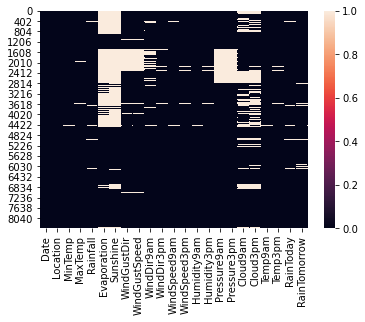

In [12]:
# Visualizing the null values
sns.heatmap(df_rp.isnull())

In [13]:
df_rp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [14]:
# Value counts of each column.
for i in df_rp.columns:
        print(df_rp[i].value_counts())
        print('-----------------------------------------------------')

2011-05-06    5
2011-03-26    5
2011-03-28    5
2011-03-16    5
2011-05-01    5
             ..
2015-09-12    1
2013-04-28    1
2013-01-11    1
2013-01-25    1
2013-03-18    1
Name: Date, Length: 3004, dtype: int64
-----------------------------------------------------
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64
-----------------------------------------------------
 12.0    74
 13.2    71
 13.8    69
 12.7    68
 14.8    67
         ..
-1.5      1
 25.9     1
-0.8      1
-1.4      1
-1.1      1
Name: MinTemp, Length: 285, dtype: int64
-----------------------------------------------------
19.0    87
23.8    75
19.8    74
25.0    71
22.3    68
        ..
44.9     1
10.0     1
43.1     1
40.6     1
10.7     1
Name: MaxTemp, Length: 331, dtype: int64
-------

# Feature Engineering & Data Cleaning

In [15]:
# Converting 'Date' from object to datetime
df_rp['Date'] = pd.to_datetime(df_rp['Date'])

In [16]:
df_rp.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

In [17]:
import datetime as dt

# Extracting Day from Date column
df_rp['Day'] = pd.to_datetime(df_rp.Date,format="%d/%m/%Y").dt.day

# Extracting Month from Date column
df_rp['Month'] = pd.to_datetime(df_rp.Date, format="%d/%m/%Y").dt.month

# Extracting Year from Date column
df_rp['Year'] = pd.to_datetime(df_rp.Date, format="%d/%m/%Y").dt.year

In [18]:
# Dropping the Date column
df_rp.drop(columns=['Date'],axis=1,inplace=True)

In [19]:
df_rp

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,1020.3,NaN,NaN,10.1,22.4,No,No,21,6,2017
8421,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,1019.1,NaN,NaN,10.9,24.5,No,No,22,6,2017
8422,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,1016.8,NaN,NaN,12.5,26.1,No,No,23,6,2017
8423,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,1016.5,3.0,2.0,15.1,26.0,No,No,24,6,2017


# Treating the Null Values

Filling the missing values in categorical columns with the mode of respective columns.

In [20]:
# Categorical columns
print("The mode of WindGustDir is:",df_rp["WindGustDir"].mode())
print("The mode of WindDir9am is:",df_rp["WindDir9am"].mode())
print("The mode of WindDir3pm is:",df_rp["WindDir3pm"].mode())
print("The mode of RainToday is:",df_rp["RainToday"].mode())
print("The mode of RainTomorrow is:",df_rp["RainTomorrow"].mode())

The mode of WindGustDir is: 0    N
dtype: object
The mode of WindDir9am is: 0    N
dtype: object
The mode of WindDir3pm is: 0    SE
dtype: object
The mode of RainToday is: 0    No
dtype: object
The mode of RainTomorrow is: 0    No
dtype: object


In [21]:
# Filling columns with mode
df_rp['WindGustDir'] = df_rp['WindGustDir'].fillna(df_rp['WindGustDir'].mode()[0])
df_rp['WindDir9am'] = df_rp['WindDir9am'].fillna(df_rp['WindDir9am'].mode()[0])
df_rp['WindDir3pm'] = df_rp['WindDir3pm'].fillna(df_rp['WindDir3pm'].mode()[0])
df_rp['RainToday'] = df_rp['RainToday'].fillna(df_rp['RainToday'].mode()[0])
df_rp['RainTomorrow'] = df_rp['RainTomorrow'].fillna(df_rp['RainTomorrow'].mode()[0])

Now, in the column `" Rainfall "` most of the rows have 0 rainfall, so we shall fill the null values this column with the mode of this column.

In [22]:
print("The mode of Rainfall is:",df_rp["Rainfall"].mode())

The mode of Rainfall is: 0    0.0
dtype: float64


In [23]:
df_rp['Rainfall'] = df_rp['Rainfall'].fillna(df_rp['Rainfall'].mode()[0])

Filling the missing values in numerical columns with the mean of respective columns.

In [24]:
print("The mean of MinTemp is:",df_rp["MinTemp"].mean())
print("The mean of MaxTemp is:",df_rp["MaxTemp"].mean())
print("The mean of Evaporation is:",df_rp["Evaporation"].mean())
print("The mean of Sunshine is:",df_rp["Sunshine"].mean())
print("The mean of WindGustSpeed is:",df_rp["WindGustSpeed"].mean())
print("The mean of WindSpeed9am is:",df_rp["WindSpeed9am"].mean())
print("The mean of WindSpeed3pm is:",df_rp["WindSpeed3pm"].mean())
print("The mean of Humidity9am is:",df_rp["Humidity9am"].mean())
print("The mean of Humidity3pm is:",df_rp["Humidity3pm"].mean())
print("The mean of Pressure9am is:",df_rp["Pressure9am"].mean())
print("The mean of Pressure3pm is:",df_rp["Pressure3pm"].mean())
print("The mean of Cloud9am is:",df_rp["Cloud9am"].mean())
print("The mean of Cloud3pm is:",df_rp["Cloud3pm"].mean())
print("The mean of Temp9am is:",df_rp["Temp9am"].mean())
print("The mean of Temp3pm is:",df_rp["Temp3pm"].mean())

The mean of MinTemp is: 13.193305389221573
The mean of MaxTemp is: 23.85997609085473
The mean of Evaporation is: 5.389395481375942
The mean of Sunshine is: 7.6322049198826525
The mean of WindGustSpeed is: 40.174468657519505
The mean of WindSpeed9am is: 13.847646424721523
The mean of WindSpeed3pm is: 18.533661937965856
The mean of Humidity9am is: 67.82249581639971
The mean of Humidity3pm is: 51.2497897392767
The mean of Pressure9am is: 1017.6402332771205
The mean of Pressure3pm is: 1015.2360747926323
The mean of Cloud9am is: 4.566622251832112
The mean of Cloud3pm is: 4.5031825795644895
The mean of Temp9am is: 17.762014577607847
The mean of Temp3pm is: 22.442934325849407


In [25]:
df_rp['MinTemp'] = df_rp['MinTemp'].fillna(round(df_rp["MinTemp"].mean(),1))
df_rp['MaxTemp'] = df_rp['MaxTemp'].fillna(round(df_rp["MaxTemp"].mean(),1))
df_rp['Evaporation'] = df_rp['Evaporation'].fillna(round(df_rp["Evaporation"].mean(),1))
df_rp['Sunshine'] = df_rp['Sunshine'].fillna(round(df_rp["Sunshine"].mean(),1))
df_rp['WindGustSpeed'] = df_rp['WindGustSpeed'].fillna(round(df_rp["WindGustSpeed"].mean(),1))
df_rp['WindSpeed9am'] = df_rp['WindSpeed9am'].fillna(round(df_rp["WindSpeed9am"].mean(),1))
df_rp['WindSpeed3pm'] = df_rp['WindSpeed3pm'].fillna(round(df_rp["WindSpeed3pm"].mean(),1))
df_rp['Humidity9am'] = df_rp['Humidity9am'].fillna(round(df_rp["Humidity9am"].mean(),1))
df_rp['Humidity3pm'] = df_rp['Humidity3pm'].fillna(round(df_rp["Humidity3pm"].mean(),1))
df_rp['Pressure9am'] = df_rp['Pressure9am'].fillna(round(df_rp["Pressure9am"].mean(),1))
df_rp['Pressure3pm'] = df_rp['Pressure3pm'].fillna(round(df_rp["Pressure3pm"].mean(),1))
df_rp['Cloud9am'] = df_rp['Cloud9am'].fillna(round(df_rp["Cloud9am"].mean(),1))
df_rp['Cloud3pm'] = df_rp['Cloud3pm'].fillna(round(df_rp["Cloud3pm"].mean(),1))
df_rp['Temp9am'] = df_rp['Temp9am'].fillna(round(df_rp["Temp9am"].mean(),1))
df_rp['Temp3pm'] = df_rp['Temp3pm'].fillna(round(df_rp["Temp3pm"].mean(),1))

In [26]:
df_rp

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,5.4,7.6,W,44.0,W,WNW,...,1007.1,8.0,4.5,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,5.4,7.6,WNW,44.0,NNW,WSW,...,1007.8,4.6,4.5,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,5.4,7.6,WSW,46.0,W,WSW,...,1008.7,4.6,2.0,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,5.4,7.6,NE,24.0,SE,E,...,1012.8,4.6,4.5,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,5.4,7.6,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Uluru,2.8,23.4,0.0,5.4,7.6,E,31.0,SE,ENE,...,1020.3,4.6,4.5,10.1,22.4,No,No,21,6,2017
8421,Uluru,3.6,25.3,0.0,5.4,7.6,NNW,22.0,SE,N,...,1019.1,4.6,4.5,10.9,24.5,No,No,22,6,2017
8422,Uluru,5.4,26.9,0.0,5.4,7.6,N,37.0,SE,WNW,...,1016.8,4.6,4.5,12.5,26.1,No,No,23,6,2017
8423,Uluru,7.8,27.0,0.0,5.4,7.6,SE,28.0,SSE,N,...,1016.5,3.0,2.0,15.1,26.0,No,No,24,6,2017


In [27]:
# Sum of null values
df_rp.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

<AxesSubplot:>

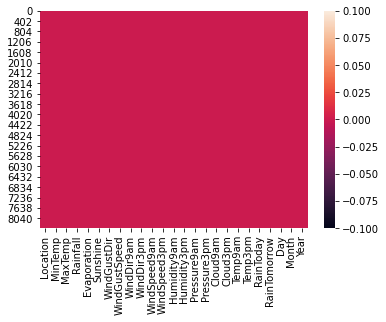

In [28]:
# Visualizing the null values
sns.heatmap(df_rp.isnull())

We have treated the null values

In [29]:
df_rp.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,13.193365,23.860261,2.725982,5.393816,7.616938,40.177472,13.847217,18.533234,67.822338,51.249187,1017.633982,1015.230457,4.576214,4.502255,17.762267,22.442445,15.741958,6.442136,2012.102433
std,5.379488,6.114516,10.319872,3.852008,2.825497,13.776103,10.128580,9.704760,16.774231,18.311895,6.275776,6.217465,2.429252,2.299419,5.608301,5.945850,8.787354,3.437994,2.473137
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,1.000000,1.000000,2008.000000
25%,9.300000,19.300000,0.000000,4.000000,7.600000,31.000000,6.000000,11.000000,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000,8.000000,3.000000,2010.000000
50%,13.200000,23.300000,0.000000,5.400000,7.600000,40.200000,13.000000,19.000000,68.000000,51.000000,1017.600000,1015.200000,4.600000,4.500000,17.800000,22.000000,16.000000,6.000000,2011.000000
75%,17.300000,28.000000,0.800000,5.400000,8.900000,48.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000,23.000000,9.000000,2014.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,31.000000,12.000000,2017.000000


In [30]:
# Mean of our target variable 'Rainfall'
df_rp.groupby('Rainfall').mean()

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
Rainfall,,,,,,,,,,,,,,,,,,
0.0,13.054685,25.021087,5.702185,8.157899,39.738834,13.910814,18.581513,62.768622,46.118216,1018.047897,1015.326864,4.050478,4.054161,18.315725,23.604983,15.861527,6.471385,2012.068966
0.1,9.103571,20.371429,5.400000,7.600000,40.200000,4.771429,8.160714,78.700000,53.542857,1017.600000,1015.200000,3.257143,3.767857,12.975000,19.178571,14.571429,6.250000,2014.321429
0.2,11.779557,21.790394,4.866010,6.954680,36.431034,11.539409,16.293103,74.553695,55.640887,1018.164532,1015.703941,5.046305,4.985222,15.712562,20.565764,15.603448,6.334975,2012.610837
0.4,13.609040,22.437288,4.801130,6.898305,39.150282,13.135593,18.898305,71.491525,58.615819,1017.836158,1015.905085,5.018079,5.149718,17.442938,20.934463,15.039548,6.259887,2011.875706
0.5,12.257143,24.057143,5.400000,7.600000,40.200000,5.857143,9.000000,79.000000,52.285714,1017.600000,1015.200000,3.000000,1.857143,17.142857,23.171429,13.000000,6.285714,2014.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142.2,24.100000,29.800000,5.400000,0.500000,78.000000,33.000000,28.000000,98.000000,84.000000,1005.900000,1002.500000,8.000000,8.000000,24.500000,28.300000,14.000000,3.000000,2012.000000
168.4,21.300000,26.600000,2.600000,0.700000,26.000000,2.000000,6.000000,98.000000,88.000000,1008.500000,1005.800000,8.000000,8.000000,23.300000,24.600000,25.000000,1.000000,2012.000000
225.0,18.500000,19.900000,5.400000,0.000000,80.000000,39.000000,35.000000,95.000000,90.000000,1008.500000,1008.800000,8.000000,8.000000,19.200000,19.400000,6.000000,1.000000,2016.000000


In [31]:
# Mean of our target variable 'RainTomorrow'
df_rp.groupby('RainTomorrow').mean()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
RainTomorrow,,,,,,,,,,,,,,,,,,,
No,12.915247,24.380308,1.468744,5.520221,8.132048,38.720578,13.462512,18.244016,65.291669,46.718340,1018.206466,1015.698213,4.200062,4.061703,17.834660,23.083385,15.817532,6.444514,2012.117656
Yes,14.092115,22.179709,6.788800,4.985334,5.952336,44.885485,15.090407,19.467855,76.000301,65.890809,1015.783978,1013.718885,5.791763,5.925917,17.528327,20.371220,15.497740,6.434455,2012.053240


In [32]:
# Unique values
df_rp.nunique()

Location          12
MinTemp          285
MaxTemp          331
Rainfall         250
Evaporation      116
Sunshine         140
WindGustDir       16
WindGustSpeed     53
WindDir9am        16
WindDir3pm        16
WindSpeed9am      35
WindSpeed3pm      36
Humidity9am       91
Humidity3pm       95
Pressure9am      384
Pressure3pm      374
Cloud9am          10
Cloud3pm          10
Temp9am          304
Temp3pm          328
RainToday          2
RainTomorrow       2
Day               31
Month             12
Year              10
dtype: int64

In [33]:
df_rp["Rainfall"].unique()

array([6.000e-01, 0.000e+00, 1.000e+00, 2.000e-01, 1.400e+00, 2.200e+00,
       1.560e+01, 3.600e+00, 1.680e+01, 1.060e+01, 1.200e+00, 8.000e-01,
       6.400e+00, 4.000e-01, 3.000e+00, 5.800e+00, 1.160e+01, 1.800e+00,
       8.600e+00, 1.260e+01, 8.400e+00, 6.200e+00, 2.000e+01, 2.100e+01,
       3.200e+00, 4.800e+00, 4.200e+00, 8.000e+00, 1.440e+01, 4.600e+00,
       2.000e+00, 5.600e+00, 1.600e+00, 6.000e+00, 4.400e+00, 5.400e+00,
       5.000e+00, 7.800e+00, 6.800e+00, 9.800e+00, 3.800e+00, 2.400e+00,
       5.200e+00, 6.600e+00, 1.340e+01, 1.020e+01, 2.880e+01, 7.000e+00,
       2.580e+01, 9.400e+00, 1.240e+01, 5.220e+01, 2.060e+01, 6.600e+01,
       1.100e+01, 1.700e+01, 1.040e+01, 2.800e+01, 2.140e+01, 1.860e+01,
       7.200e+00, 8.200e+00, 1.080e+01, 1.540e+01, 9.600e+00, 4.000e+00,
       2.180e+01, 2.080e+01, 2.480e+01, 1.000e+01, 1.140e+01, 1.900e+01,
       2.220e+01, 3.280e+01, 3.400e+00, 5.080e+01, 5.260e+01, 1.920e+01,
       1.880e+01, 1.480e+01, 1.200e+01, 1.840e+01, 

In [34]:
df_rp['Rainfall'].value_counts()

0.0      5539
0.2       406
0.4       177
0.6       116
1.2        86
         ... 
41.2        1
240.0       1
67.0        1
128.0       1
6.3         1
Name: Rainfall, Length: 250, dtype: int64

In [35]:
#Checking for any empty observation in target column
df_rp.loc[df_rp['Rainfall'] == " "]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year


In [36]:
df_rp["RainTomorrow"].unique()

array(['No', 'Yes'], dtype=object)

In [37]:
df_rp['RainTomorrow'].value_counts()

No     6434
Yes    1991
Name: RainTomorrow, dtype: int64

In [38]:
#Checking for any empty observation in target column
df_rp.loc[df_rp['RainTomorrow'] == " "]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year


No empty observations present in both the target columns.

# Data Visualization

In [39]:
df_rp.nunique()

Location          12
MinTemp          285
MaxTemp          331
Rainfall         250
Evaporation      116
Sunshine         140
WindGustDir       16
WindGustSpeed     53
WindDir9am        16
WindDir3pm        16
WindSpeed9am      35
WindSpeed3pm      36
Humidity9am       91
Humidity3pm       95
Pressure9am      384
Pressure3pm      374
Cloud9am          10
Cloud3pm          10
Temp9am          304
Temp3pm          328
RainToday          2
RainTomorrow       2
Day               31
Month             12
Year              10
dtype: int64

In [40]:
df_rp.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
Day                int64
Month              int64
Year               int64
dtype: object

In [41]:
# Categorical Columns
categorical_columns=[]
for i in df_rp.dtypes.index:
    if df_rp.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [42]:
# Numerical Columns
numerical_columns=[]
for i in df_rp.dtypes.index:
    if df_rp.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year']


## Uni-Variate Analysis

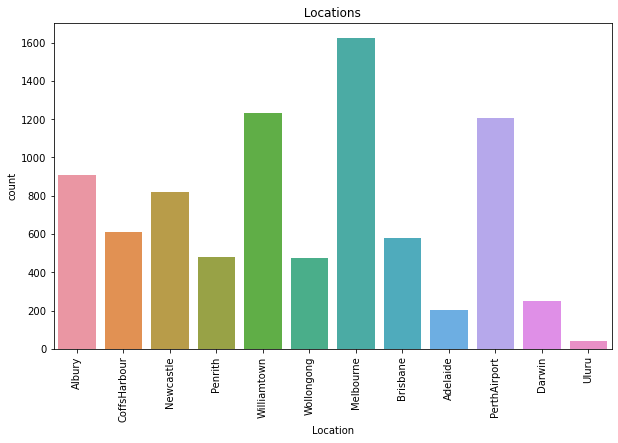

In [43]:
plt.figure(figsize=(10,6))
sns.countplot(df_rp['Location'])
plt.title(" Locations ")
plt.xticks(rotation=90)
plt.show();

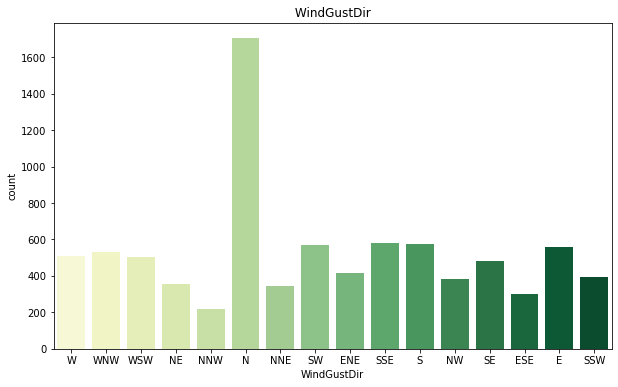

In [44]:
plt.figure(figsize=(10,6))
sns.countplot(df_rp['WindGustDir'],palette='YlGn')
plt.title(" WindGustDir ")
plt.show();

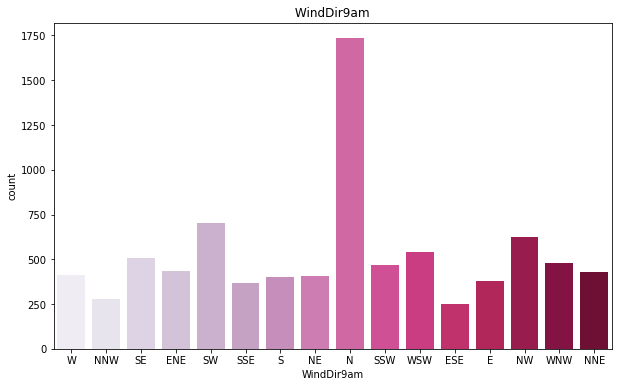

In [45]:
plt.figure(figsize=(10,6))
sns.countplot(df_rp['WindDir9am'],palette='PuRd')
plt.title(" WindDir9am ")
plt.show();

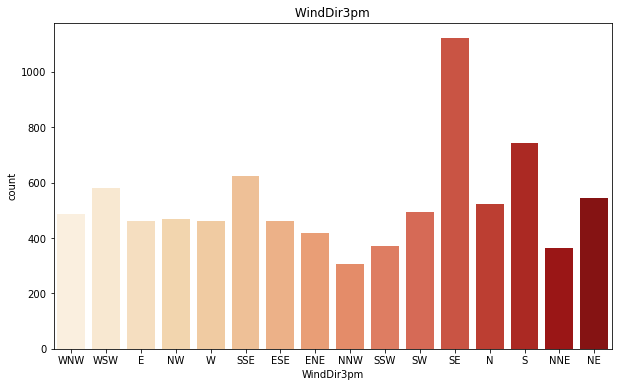

In [46]:
plt.figure(figsize=(10,6))
sns.countplot(df_rp['WindDir3pm'],palette='OrRd')
plt.title(" WindDir3pm ")
plt.show();

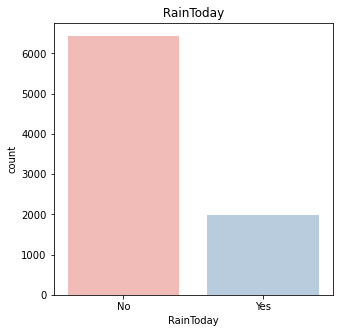

In [47]:
plt.figure(figsize=(5,5))
sns.countplot(df_rp['RainToday'],palette='Pastel1')
plt.title(" RainToday ")
plt.show();

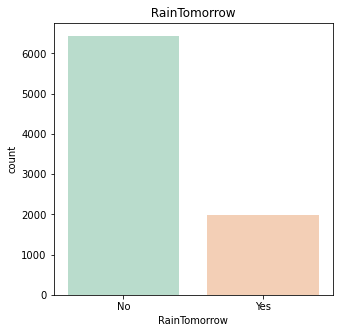

In [48]:
plt.figure(figsize=(5,5))
sns.countplot(df_rp['RainTomorrow'],palette='Pastel2')
plt.title(" RainTomorrow ")
plt.show();

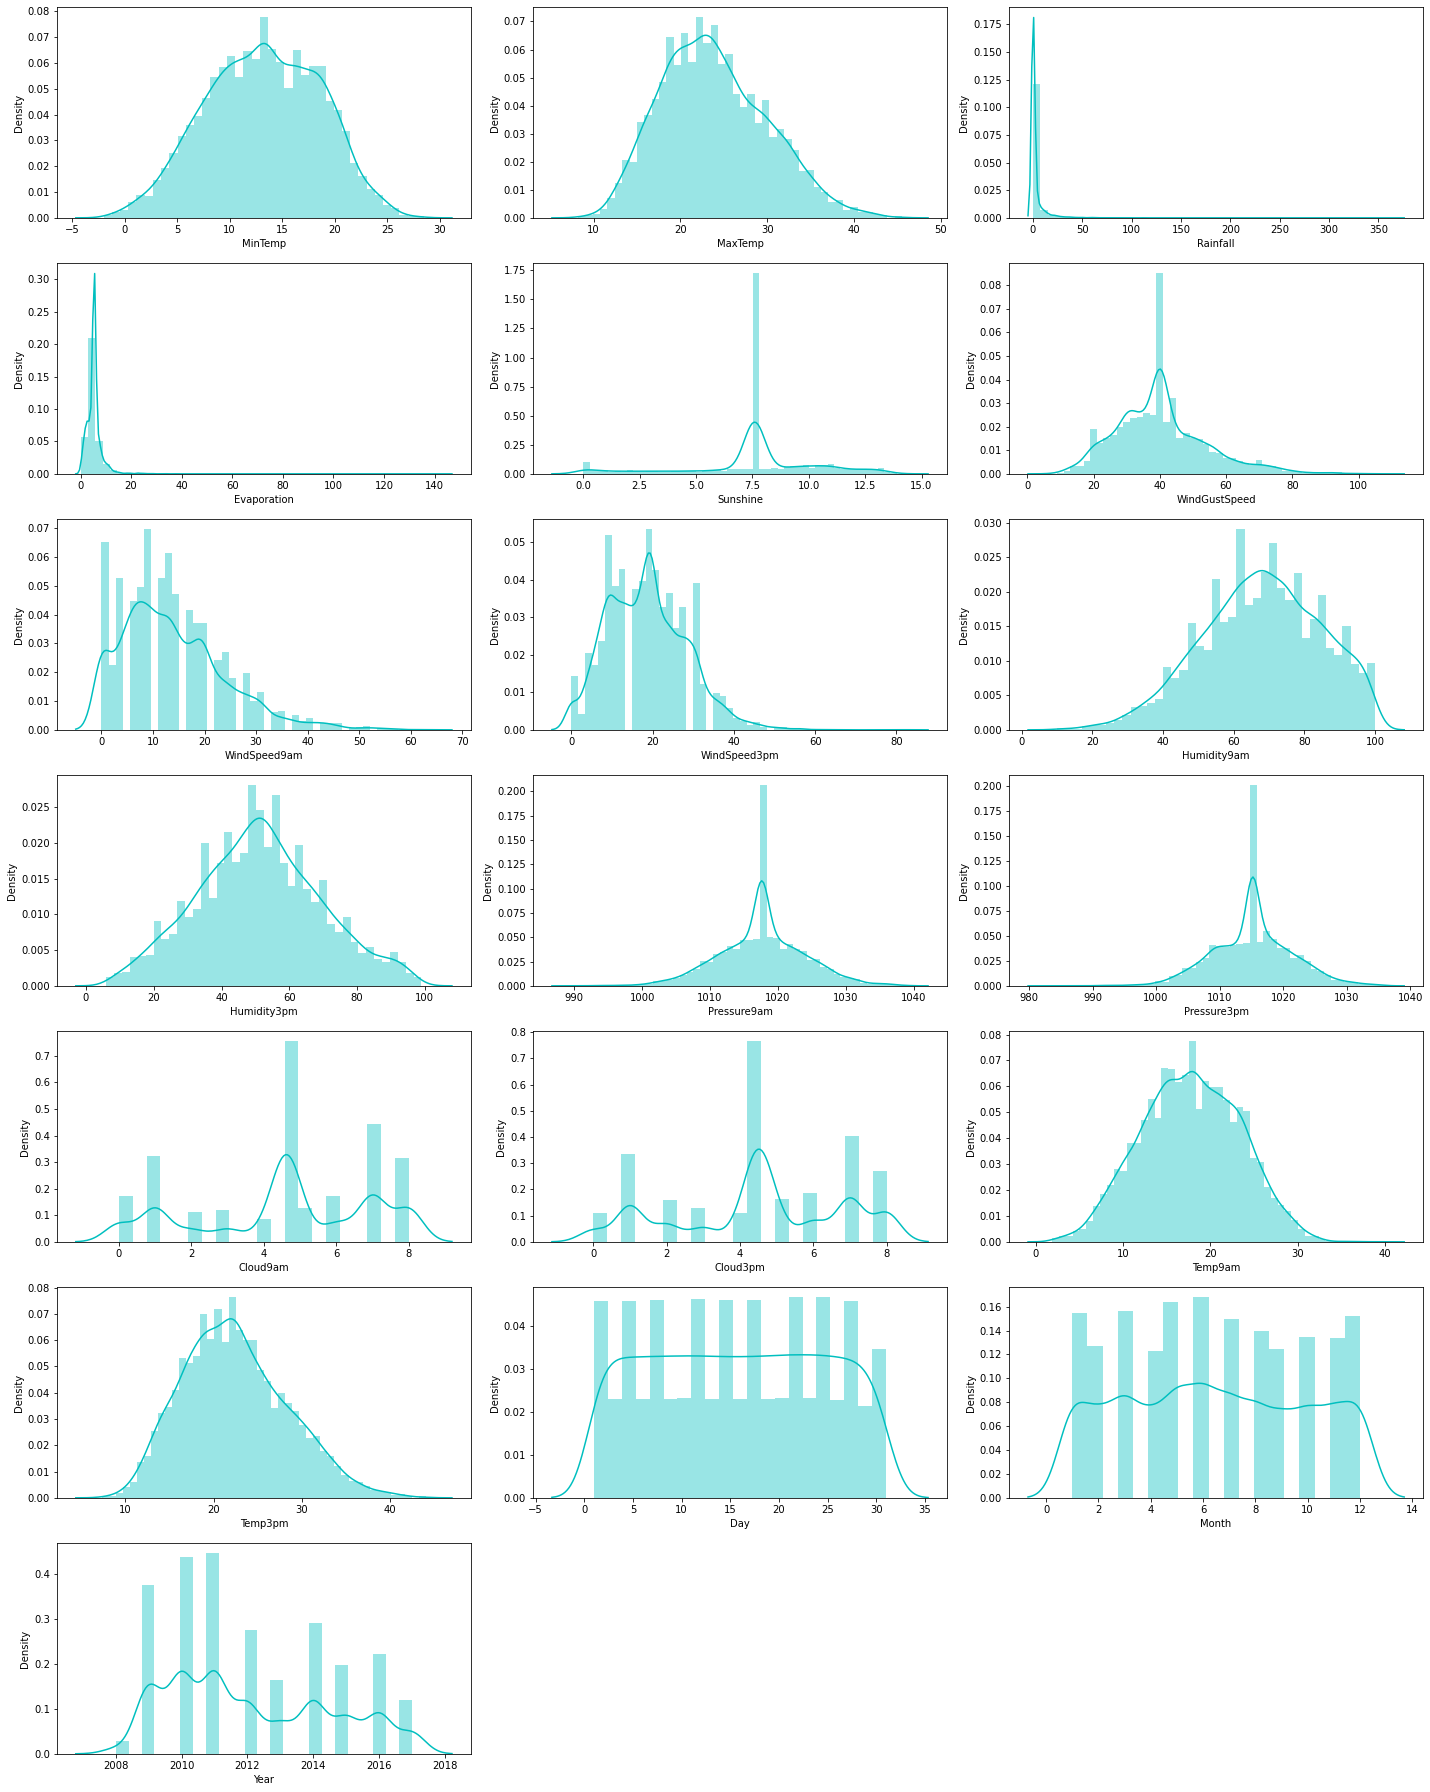

In [49]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for columns in numerical_columns:
    if plotnumber<=20:
        ax=plt.subplot(7,3,plotnumber)
        sns.distplot(df_rp[columns],color="c")
        plt.xlabel(columns,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

## Bivariate Analysis

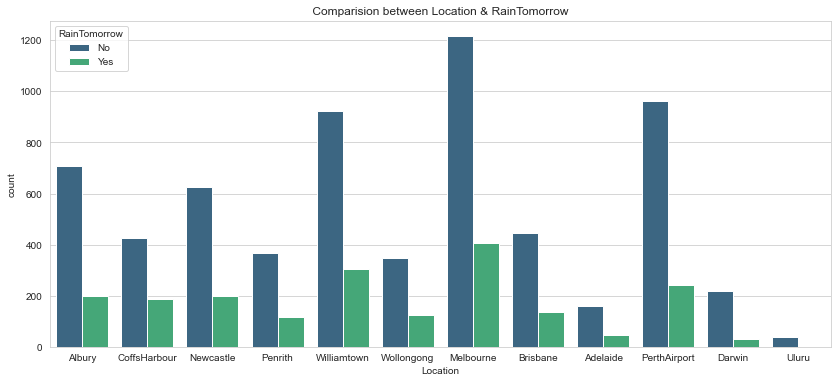

In [50]:
plt.figure(figsize=(14,6))
sns.set_style('whitegrid')
sns.countplot(x='Location',hue='RainTomorrow',data=df_rp,palette='viridis')
plt.title(" Comparision between Location & RainTomorrow ")
plt.show()

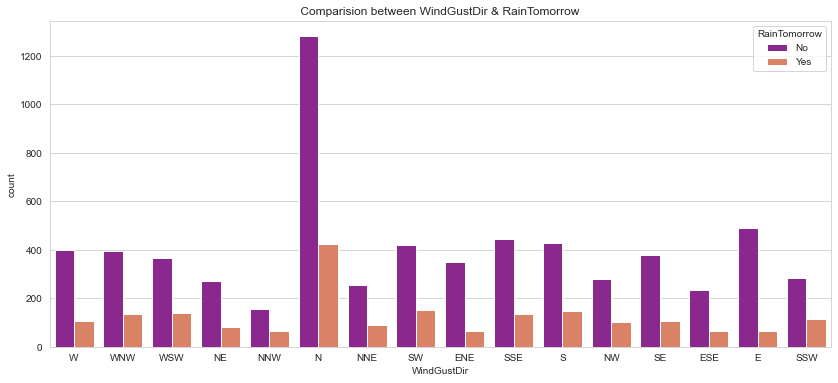

In [51]:
plt.figure(figsize=(14,6))
sns.set_style('whitegrid')
sns.countplot(x='WindGustDir',hue='RainTomorrow',data=df_rp,palette='plasma')
plt.title(" Comparision between WindGustDir & RainTomorrow ")
plt.show()

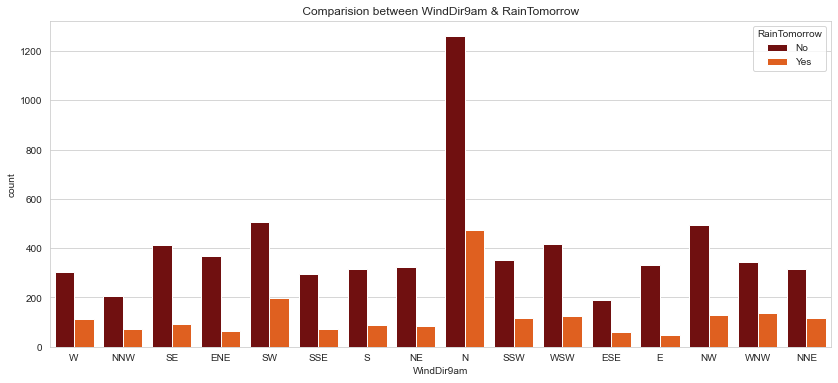

In [52]:
plt.figure(figsize=(14,6))
sns.set_style('whitegrid')
sns.countplot(x='WindDir9am',hue='RainTomorrow',data=df_rp,palette='gist_heat')
plt.title(" Comparision between WindDir9am & RainTomorrow ")
plt.show()

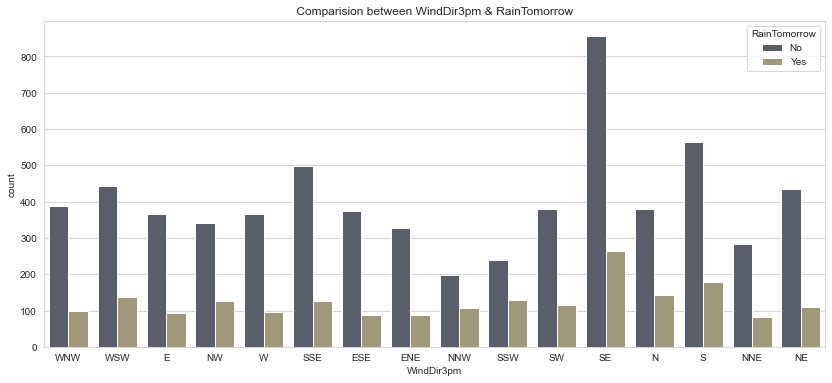

In [53]:
plt.figure(figsize=(14,6))
sns.set_style('whitegrid')
sns.countplot(x='WindDir3pm',hue='RainTomorrow',data=df_rp,palette='cividis')
plt.title(" Comparision between WindDir3pm & RainTomorrow ")
plt.show()

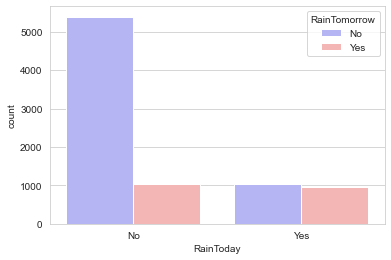

In [54]:
sns.set_style('whitegrid')
sns.countplot(x='RainToday',hue='RainTomorrow',data=df_rp,palette='bwr');

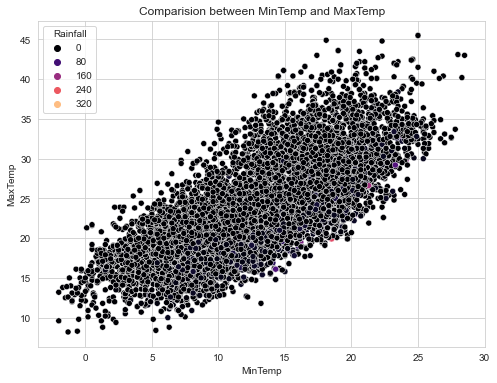

In [55]:
plt.figure(figsize=[8,6])
plt.title('Comparision between MinTemp and MaxTemp')
sns.scatterplot(df_rp['MinTemp'],df_rp['MaxTemp'],hue=df_rp['Rainfall'],palette="magma");

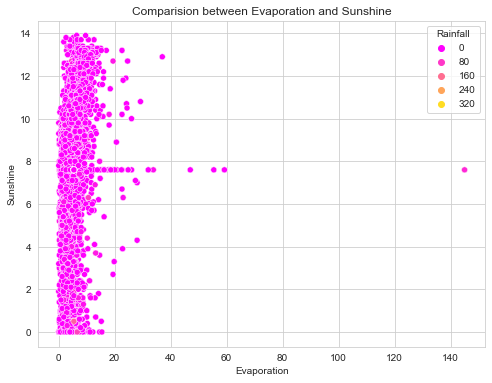

In [56]:
plt.figure(figsize=[8,6])
plt.title('Comparision between Evaporation and Sunshine')
sns.scatterplot(df_rp['Evaporation'],df_rp['Sunshine'],hue=df_rp['Rainfall'],palette="spring");

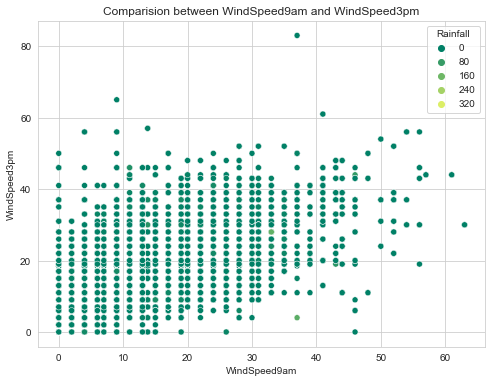

In [57]:
plt.figure(figsize=[8,6])
plt.title('Comparision between WindSpeed9am and WindSpeed3pm')
sns.scatterplot(df_rp['WindSpeed9am'],df_rp['WindSpeed3pm'],hue=df_rp['Rainfall'],palette="summer");

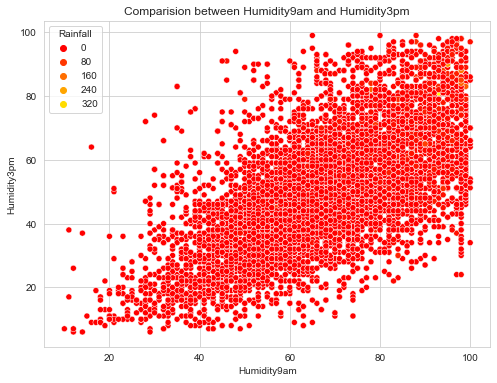

In [58]:
plt.figure(figsize=[8,6])
plt.title('Comparision between Humidity9am and Humidity3pm')
sns.scatterplot(df_rp['Humidity9am'],df_rp['Humidity3pm'],hue=df_rp['Rainfall'],palette="autumn");

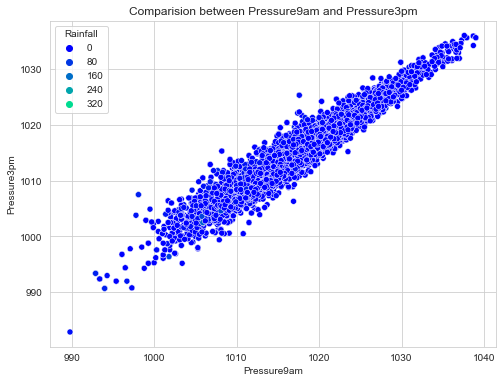

In [59]:
plt.figure(figsize=[8,6])
plt.title('Comparision between Pressure9am and Pressure3pm')
sns.scatterplot(df_rp['Pressure9am'],df_rp['Pressure3pm'],hue=df_rp['Rainfall'],palette="winter");

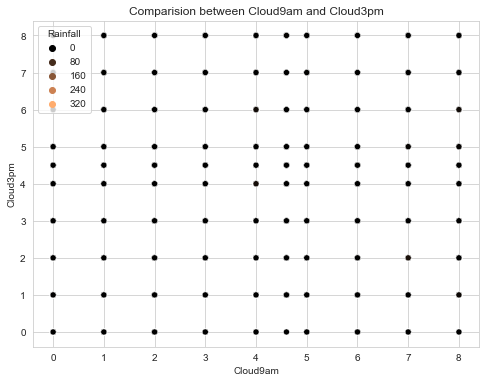

In [60]:
plt.figure(figsize=[8,6])
plt.title('Comparision between Cloud9am and Cloud3pm')
sns.scatterplot(df_rp['Cloud9am'],df_rp['Cloud3pm'],hue=df_rp['Rainfall'],palette="copper");

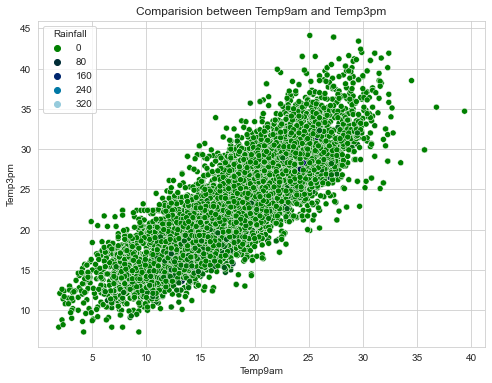

In [61]:
plt.figure(figsize=[8,6])
plt.title('Comparision between Temp9am and Temp3pm')
sns.scatterplot(df_rp['Temp9am'],df_rp['Temp3pm'],hue=df_rp['Rainfall'],palette="ocean");

<AxesSubplot:xlabel='Sunshine', ylabel='RainTomorrow'>

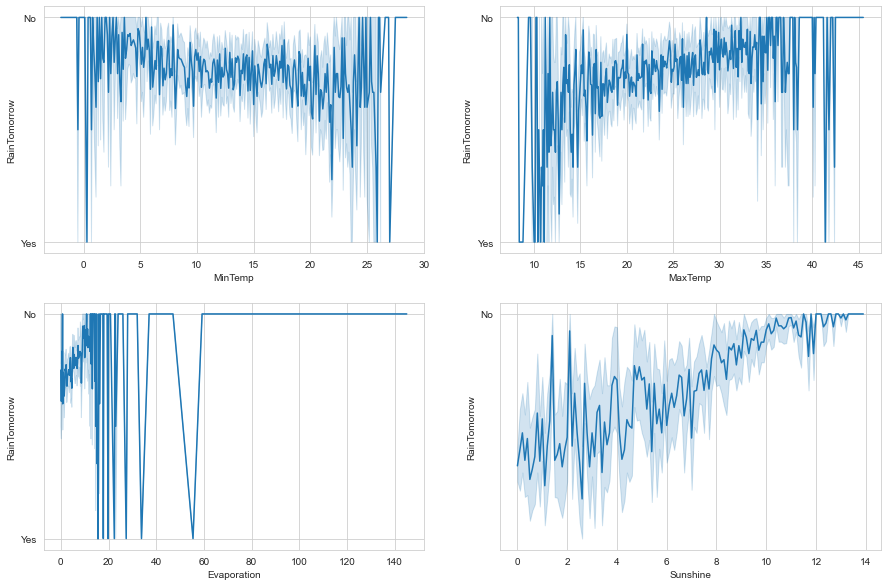

In [62]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

# checking the relation between MinTemp and RainTomorrow
sns.lineplot(x='MinTemp',y='RainTomorrow',ax=axes[0,0],data=df_rp)

# checking the relation between MaxTemp and RainTomorrow
sns.lineplot(x='MaxTemp',y='RainTomorrow',ax=axes[0,1],data=df_rp)

# checking the relation between Evaporation and RainTomorrow
sns.lineplot(x='Evaporation',y='RainTomorrow',ax=axes[1,0],data=df_rp)

# checking the relation between Sunshine and RainTomorrow
sns.lineplot(x='Sunshine',y='RainTomorrow',ax=axes[1,1],data=df_rp)

<AxesSubplot:xlabel='Humidity3pm', ylabel='RainTomorrow'>

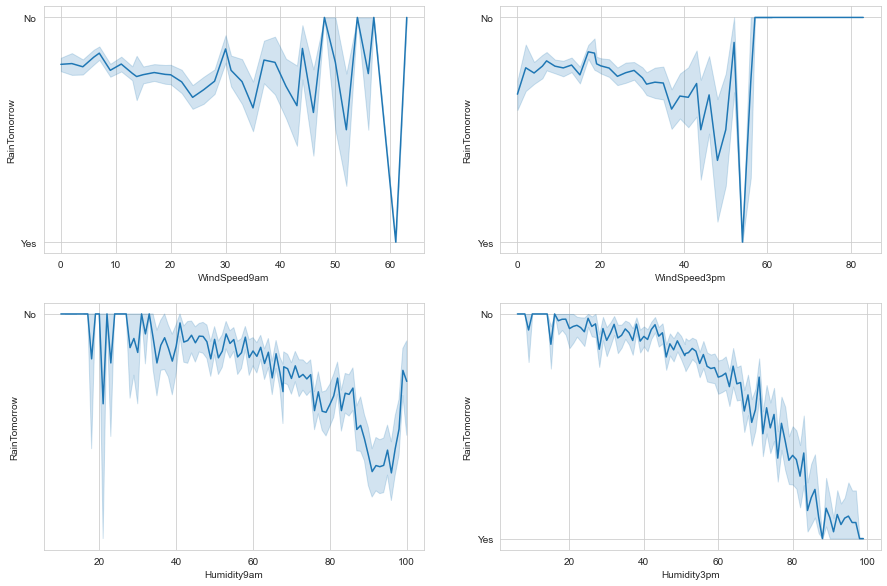

In [63]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

# checking the relation between WindSpeed9am and RainTomorrow
sns.lineplot(x='WindSpeed9am',y='RainTomorrow',ax=axes[0,0],data=df_rp)

# checking the relation between WindSpeed3pm and RainTomorrow
sns.lineplot(x='WindSpeed3pm',y='RainTomorrow',ax=axes[0,1],data=df_rp)

# checking the relation between Humidity9am and RainTomorrow
sns.lineplot(x='Humidity9am',y='RainTomorrow',ax=axes[1,0],data=df_rp)

# checking the relation between Humidity3pm and RainTomorrow
sns.lineplot(x='Humidity3pm',y='RainTomorrow',ax=axes[1,1],data=df_rp)

<AxesSubplot:xlabel='Cloud3pm', ylabel='RainTomorrow'>

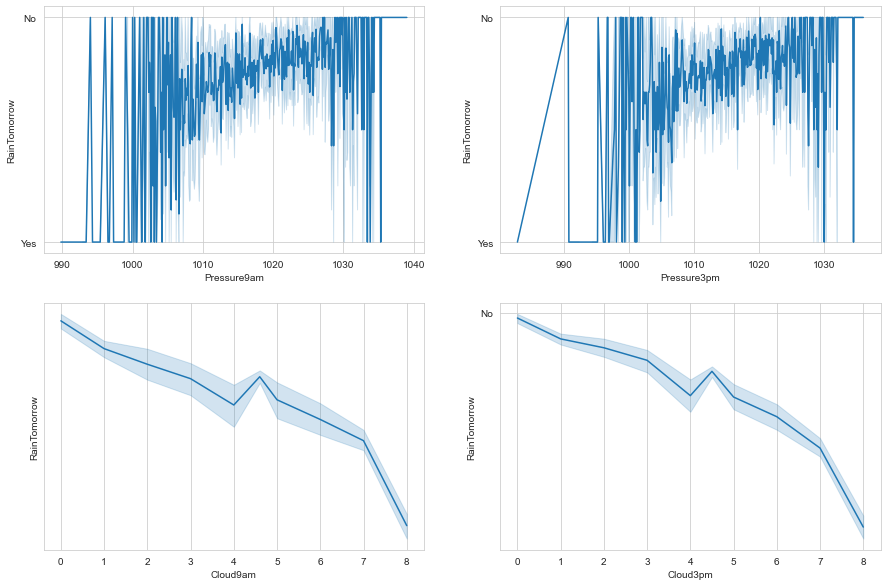

In [64]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

# checking the relation between Pressure9am and RainTomorrow
sns.lineplot(x='Pressure9am',y='RainTomorrow',ax=axes[0,0],data=df_rp)

# checking the relation between Pressure3pm and RainTomorrow
sns.lineplot(x='Pressure3pm',y='RainTomorrow',ax=axes[0,1],data=df_rp)

# checking the relation between Cloud9am and RainTomorrow
sns.lineplot(x='Cloud9am',y='RainTomorrow',ax=axes[1,0],data=df_rp)

# checking the relation between Cloud3pm and RainTomorrow
sns.lineplot(x='Cloud3pm',y='RainTomorrow',ax=axes[1,1],data=df_rp)

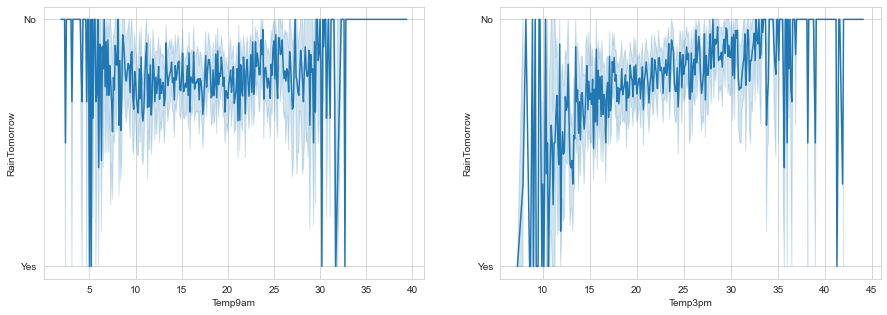

In [65]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
# checking the relation between Cloud9am and RainTomorrow
sns.lineplot(x='Temp9am',y='RainTomorrow',data=df_rp)

plt.subplot(1,2,2)
# checking the relation between Cloud3pm and RainTomorrow
sns.lineplot(x='Temp3pm',y='RainTomorrow',data=df_rp)
plt.show()

# Encoding the Data Frame

In [39]:
df_rp.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'Month', 'Year'],
      dtype='object')

In [40]:
df_rp.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
Day                int64
Month              int64
Year               int64
dtype: object

Label Encoder is used to encode the dataframe to make it easier to build the model.

In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [42]:
df_rp['Location'] = le.fit_transform(df_rp['Location'])
df_rp['WindGustDir'] = le.fit_transform(df_rp['WindGustDir'])
df_rp['WindDir9am'] = le.fit_transform(df_rp['WindDir9am'])
df_rp['WindDir3pm'] = le.fit_transform(df_rp['WindDir3pm'])
df_rp['RainToday'] = le.fit_transform(df_rp['RainToday'])
df_rp['RainTomorrow'] = le.fit_transform(df_rp['RainTomorrow'])

In [43]:
df_rp

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.9,0.6,5.4,7.6,13,44.0,13,14,...,1007.1,8.0,4.5,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.1,0.0,5.4,7.6,14,44.0,6,15,...,1007.8,4.6,4.5,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.7,0.0,5.4,7.6,15,46.0,13,15,...,1008.7,4.6,2.0,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.0,0.0,5.4,7.6,4,24.0,9,0,...,1012.8,4.6,4.5,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.3,1.0,5.4,7.6,13,41.0,1,7,...,1006.0,7.0,8.0,17.8,29.7,0,0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.4,0.0,5.4,7.6,0,31.0,9,1,...,1020.3,4.6,4.5,10.1,22.4,0,0,21,6,2017
8421,9,3.6,25.3,0.0,5.4,7.6,6,22.0,9,3,...,1019.1,4.6,4.5,10.9,24.5,0,0,22,6,2017
8422,9,5.4,26.9,0.0,5.4,7.6,3,37.0,9,14,...,1016.8,4.6,4.5,12.5,26.1,0,0,23,6,2017
8423,9,7.8,27.0,0.0,5.4,7.6,9,28.0,10,3,...,1016.5,3.0,2.0,15.1,26.0,0,0,24,6,2017


# Outliers

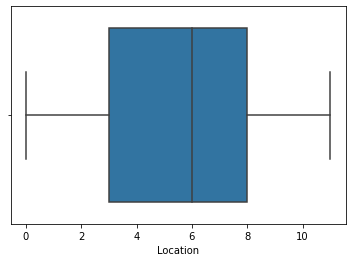

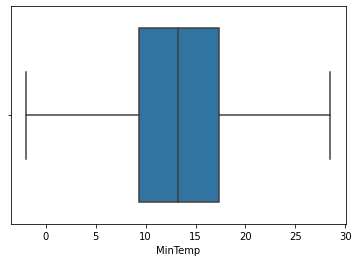

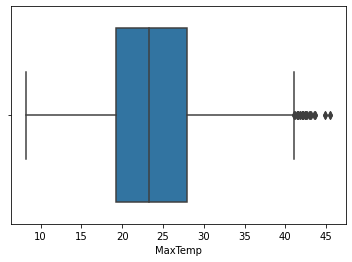

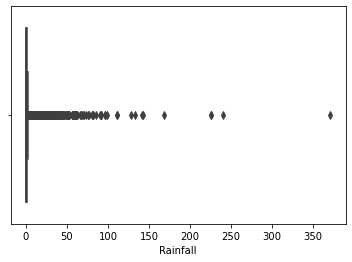

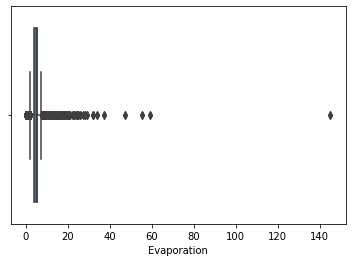

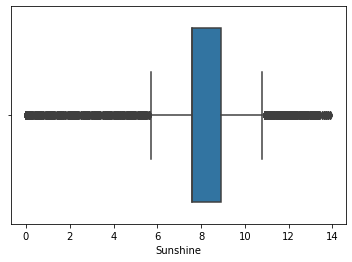

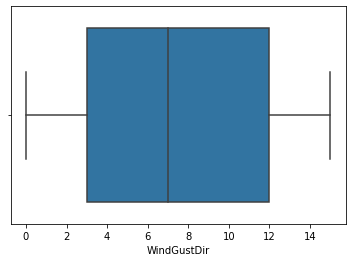

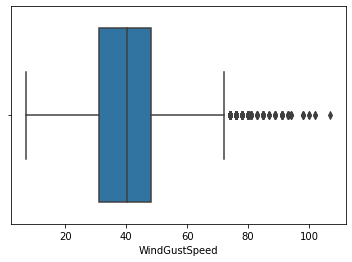

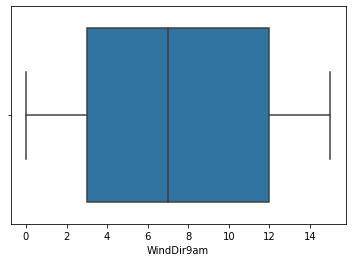

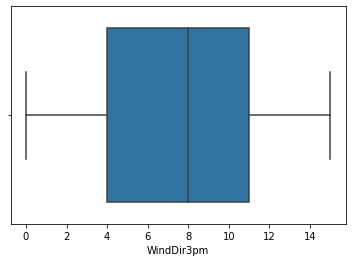

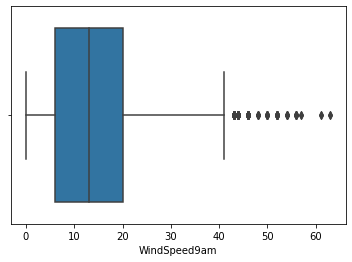

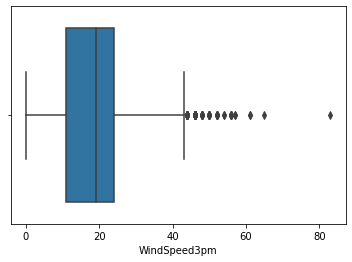

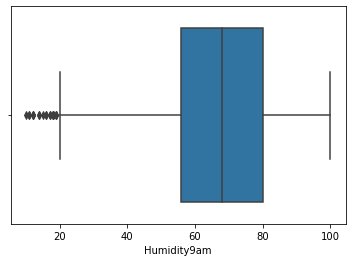

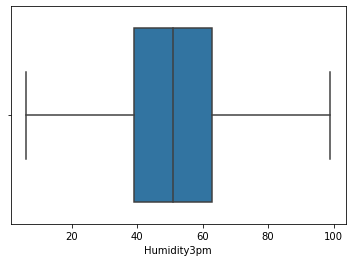

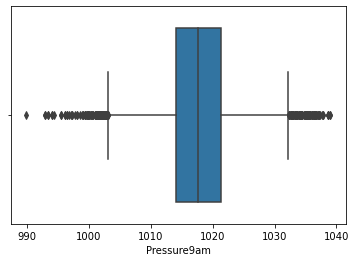

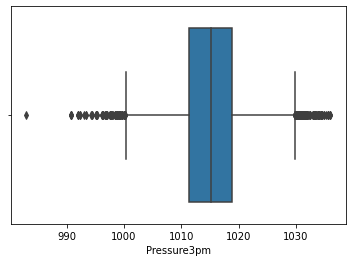

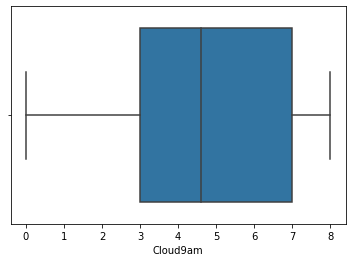

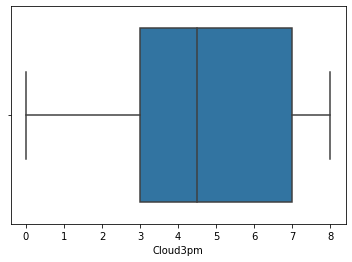

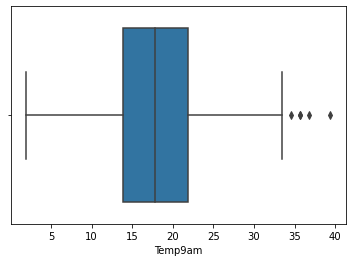

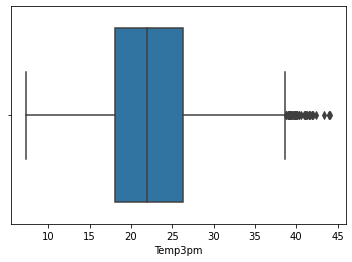

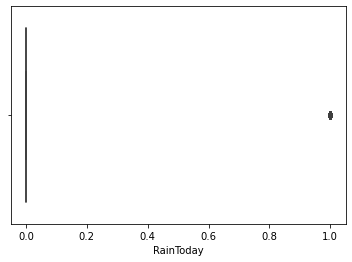

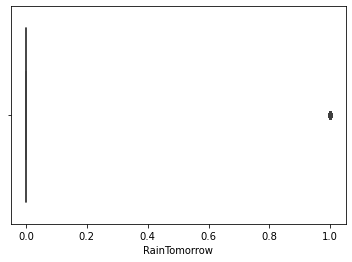

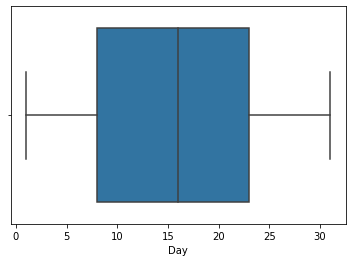

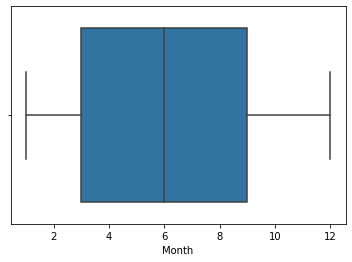

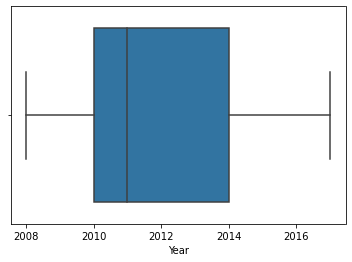

In [44]:
for i in df_rp.columns:
    sns.boxplot(df_rp[i])
    plt.show()

Location            AxesSubplot(0.125,0.657941;0.0596154x0.222059)
MinTemp          AxesSubplot(0.196538,0.657941;0.0596154x0.222059)
MaxTemp          AxesSubplot(0.268077,0.657941;0.0596154x0.222059)
Rainfall         AxesSubplot(0.339615,0.657941;0.0596154x0.222059)
Evaporation      AxesSubplot(0.411154,0.657941;0.0596154x0.222059)
Sunshine         AxesSubplot(0.482692,0.657941;0.0596154x0.222059)
WindGustDir      AxesSubplot(0.554231,0.657941;0.0596154x0.222059)
WindGustSpeed    AxesSubplot(0.625769,0.657941;0.0596154x0.222059)
WindDir9am       AxesSubplot(0.697308,0.657941;0.0596154x0.222059)
WindDir3pm       AxesSubplot(0.768846,0.657941;0.0596154x0.222059)
WindSpeed9am     AxesSubplot(0.840385,0.657941;0.0596154x0.222059)
WindSpeed3pm        AxesSubplot(0.125,0.391471;0.0596154x0.222059)
Humidity9am      AxesSubplot(0.196538,0.391471;0.0596154x0.222059)
Humidity3pm      AxesSubplot(0.268077,0.391471;0.0596154x0.222059)
Pressure9am      AxesSubplot(0.339615,0.391471;0.0596154x0.222

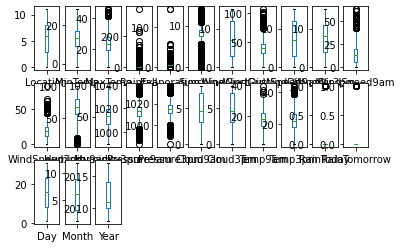

In [45]:
df_rp.plot(kind='box',subplots=True,layout=(3,11))

We can see outliers present in the columns : `MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Pressure9am, Pressure3pm, Temp9am, Temp3pm, RainToday & RainTomorrow`.

# Removing Outliers

In [46]:
df_outliers=df_rp[["MaxTemp", "Rainfall", "Evaporation","Sunshine","WindGustSpeed","WindSpeed9am","WindSpeed3pm","Humidity9am","Pressure9am","Pressure3pm","Temp9am","Temp3pm","RainToday","RainTomorrow"]]

In [47]:
from scipy.stats import zscore

z=np.abs(zscore(df_outliers))
df_RAINFALL=df_rp[(z<3).all(axis=1)]
df_RAINFALL

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.9,0.6,5.4,7.6,13,44.0,13,14,...,1007.1,8.0,4.5,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.1,0.0,5.4,7.6,14,44.0,6,15,...,1007.8,4.6,4.5,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.7,0.0,5.4,7.6,15,46.0,13,15,...,1008.7,4.6,2.0,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.0,0.0,5.4,7.6,4,24.0,9,0,...,1012.8,4.6,4.5,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.3,1.0,5.4,7.6,13,41.0,1,7,...,1006.0,7.0,8.0,17.8,29.7,0,0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.4,0.0,5.4,7.6,0,31.0,9,1,...,1020.3,4.6,4.5,10.1,22.4,0,0,21,6,2017
8421,9,3.6,25.3,0.0,5.4,7.6,6,22.0,9,3,...,1019.1,4.6,4.5,10.9,24.5,0,0,22,6,2017
8422,9,5.4,26.9,0.0,5.4,7.6,3,37.0,9,14,...,1016.8,4.6,4.5,12.5,26.1,0,0,23,6,2017
8423,9,7.8,27.0,0.0,5.4,7.6,9,28.0,10,3,...,1016.5,3.0,2.0,15.1,26.0,0,0,24,6,2017


In [48]:
df_RAINFALL.shape

(7987, 25)

In [49]:
df_rp.shape

(8425, 25)

In [50]:
Data_loss=((8425-7987)/8425)*100
Data_loss

5.198813056379822

The data loss after z-score method is `5.19 %`.

# Skewness

In [51]:
df_RAINFALL.skew().sort_values()

Sunshine        -0.707353
Cloud9am        -0.368691
Cloud3pm        -0.265624
Humidity9am     -0.231626
WindDir3pm      -0.126255
MinTemp         -0.084583
Location        -0.040284
Temp9am         -0.038179
Day              0.002731
Pressure9am      0.023946
Pressure3pm      0.047788
Month            0.054460
WindGustDir      0.112339
Humidity3pm      0.125254
WindDir9am       0.160081
WindSpeed3pm     0.300254
MaxTemp          0.314359
Temp3pm          0.334436
Year             0.430100
WindGustSpeed    0.506168
WindSpeed9am     0.711533
Evaporation      0.839898
RainTomorrow     1.296077
RainToday        1.301170
Rainfall         3.519090
dtype: float64

We can see high skewness in `Rainfall, Evaporation, Sunshine, WindGustSpeed & WindSpeed9am`.

In [52]:
df_skew=["Rainfall", "Evaporation", "Sunshine","WindGustSpeed","WindSpeed9am"]

We shall use Power Transformer to remove skewness.

In [53]:
from sklearn.preprocessing import PowerTransformer
scal = PowerTransformer(method='yeo-johnson')

In [54]:
df_RAINFALL[df_skew] = scal.fit_transform(df_RAINFALL[df_skew].values)

In [55]:
df_RAINFALL[df_skew].skew()

Rainfall         1.040980
Evaporation      0.074684
Sunshine        -0.063142
WindGustSpeed    0.003091
WindSpeed9am    -0.111448
dtype: float64

We have reduced the skewness in respective columns.

In [56]:
df_RAINFALL

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.9,0.773058,0.188308,-0.101924,13,0.433602,13,14,...,1007.1,8.0,4.5,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.1,-0.654231,0.188308,-0.101924,14,0.433602,6,15,...,1007.8,4.6,4.5,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.7,-0.654231,0.188308,-0.101924,15,0.579087,13,15,...,1008.7,4.6,2.0,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.0,-0.654231,0.188308,-0.101924,4,-1.257283,9,0,...,1012.8,4.6,4.5,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.3,1.135607,0.188308,-0.101924,13,0.209036,1,7,...,1006.0,7.0,8.0,17.8,29.7,0,0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.4,-0.654231,0.188308,-0.101924,0,-0.605818,9,1,...,1020.3,4.6,4.5,10.1,22.4,0,0,21,6,2017
8421,9,3.6,25.3,-0.654231,0.188308,-0.101924,6,-1.460139,9,3,...,1019.1,4.6,4.5,10.9,24.5,0,0,22,6,2017
8422,9,5.4,26.9,-0.654231,0.188308,-0.101924,3,-0.103544,9,14,...,1016.8,4.6,4.5,12.5,26.1,0,0,23,6,2017
8423,9,7.8,27.0,-0.654231,0.188308,-0.101924,9,-0.875070,10,3,...,1016.5,3.0,2.0,15.1,26.0,0,0,24,6,2017


# Correlation

In [57]:
df_RAINFALL.corr()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
Location,1.000000,0.116696,0.063802,0.009958,0.131433,0.038385,-0.037707,0.256675,-0.041030,-0.031195,...,-0.012472,0.041856,0.027060,0.118113,0.060695,0.002934,0.009222,-0.004978,-0.086011,0.481143
MinTemp,0.116696,1.000000,0.718595,0.062854,0.371930,0.088154,-0.154943,0.248231,-0.045239,-0.154183,...,-0.427779,0.088322,0.036756,0.888691,0.687601,0.061725,0.091023,0.010924,-0.247067,0.040006
MaxTemp,0.063802,0.718595,1.000000,-0.247313,0.472041,0.403074,-0.238000,0.150883,-0.217186,-0.190411,...,-0.414314,-0.252760,-0.248234,0.864861,0.974973,-0.219760,-0.149723,0.017064,-0.164366,0.120228
Rainfall,0.009958,0.062854,-0.247313,1.000000,-0.191782,-0.258748,0.134018,0.074172,0.155777,0.120945,...,-0.026520,0.300388,0.267679,-0.109506,-0.257639,0.932866,0.315988,-0.017966,-0.004576,0.004201
Evaporation,0.131433,0.371930,0.472041,-0.191782,1.000000,0.388205,-0.121247,0.184397,-0.110013,-0.038421,...,-0.277895,-0.110726,-0.144682,0.440268,0.458364,-0.167036,-0.090248,0.010833,-0.053399,0.137216
Sunshine,0.038385,0.088154,0.403074,-0.258748,0.388205,1.000000,-0.111952,0.031486,-0.081838,-0.073504,...,-0.073803,-0.544837,-0.555202,0.285893,0.418387,-0.222958,-0.315211,0.004641,0.001248,0.022986
WindGustDir,-0.037707,-0.154943,-0.238000,0.134018,-0.121247,-0.111952,1.000000,0.000843,0.405681,0.507292,...,-0.007742,0.124176,0.093466,-0.185115,-0.249713,0.121709,0.044378,0.017003,0.038044,-0.096042
WindGustSpeed,0.256675,0.248231,0.150883,0.074172,0.184397,0.031486,0.000843,1.000000,-0.065636,0.082828,...,-0.331481,0.007114,0.059380,0.218993,0.116426,0.076270,0.172752,-0.005567,0.047466,-0.024714
WindDir9am,-0.041030,-0.045239,-0.217186,0.155777,-0.110013,-0.081838,0.405681,-0.065636,1.000000,0.243622,...,0.081718,0.092497,0.062625,-0.101618,-0.224342,0.149239,0.027091,-0.010014,0.018344,-0.034468
WindDir3pm,-0.031195,-0.154183,-0.190411,0.120945,-0.038421,-0.073504,0.507292,0.082828,0.243622,1.000000,...,-0.037290,0.073949,0.054311,-0.171994,-0.202027,0.100983,0.003674,-0.000714,0.028629,-0.010781


In [58]:
df_RAINFALL.corr()['Rainfall'].sort_values(ascending=False)

Rainfall         1.000000
RainToday        0.932866
Humidity9am      0.405788
Humidity3pm      0.386156
RainTomorrow     0.315988
Cloud9am         0.300388
Cloud3pm         0.267679
WindDir9am       0.155777
WindGustDir      0.134018
WindDir3pm       0.120945
WindGustSpeed    0.074172
MinTemp          0.062854
WindSpeed9am     0.025032
WindSpeed3pm     0.019713
Location         0.009958
Year             0.004201
Month           -0.004576
Day             -0.017966
Pressure3pm     -0.026520
Pressure9am     -0.103914
Temp9am         -0.109506
Evaporation     -0.191782
MaxTemp         -0.247313
Temp3pm         -0.257639
Sunshine        -0.258748
Name: Rainfall, dtype: float64

In [59]:
df_RAINFALL.corr()['RainTomorrow'].sort_values(ascending=False)

RainTomorrow     1.000000
Humidity3pm      0.445895
Cloud3pm         0.337988
Rainfall         0.315988
RainToday        0.294528
Humidity9am      0.269721
Cloud9am         0.269085
WindGustSpeed    0.172752
MinTemp          0.091023
WindSpeed9am     0.057059
WindGustDir      0.044378
WindSpeed3pm     0.042479
WindDir9am       0.027091
Location         0.009222
WindDir3pm       0.003674
Month            0.000135
Year            -0.003180
Day             -0.012493
Temp9am         -0.021452
Evaporation     -0.090248
Pressure3pm     -0.124967
MaxTemp         -0.149723
Pressure9am     -0.152706
Temp3pm         -0.191693
Sunshine        -0.315211
Name: RainTomorrow, dtype: float64

<AxesSubplot:>

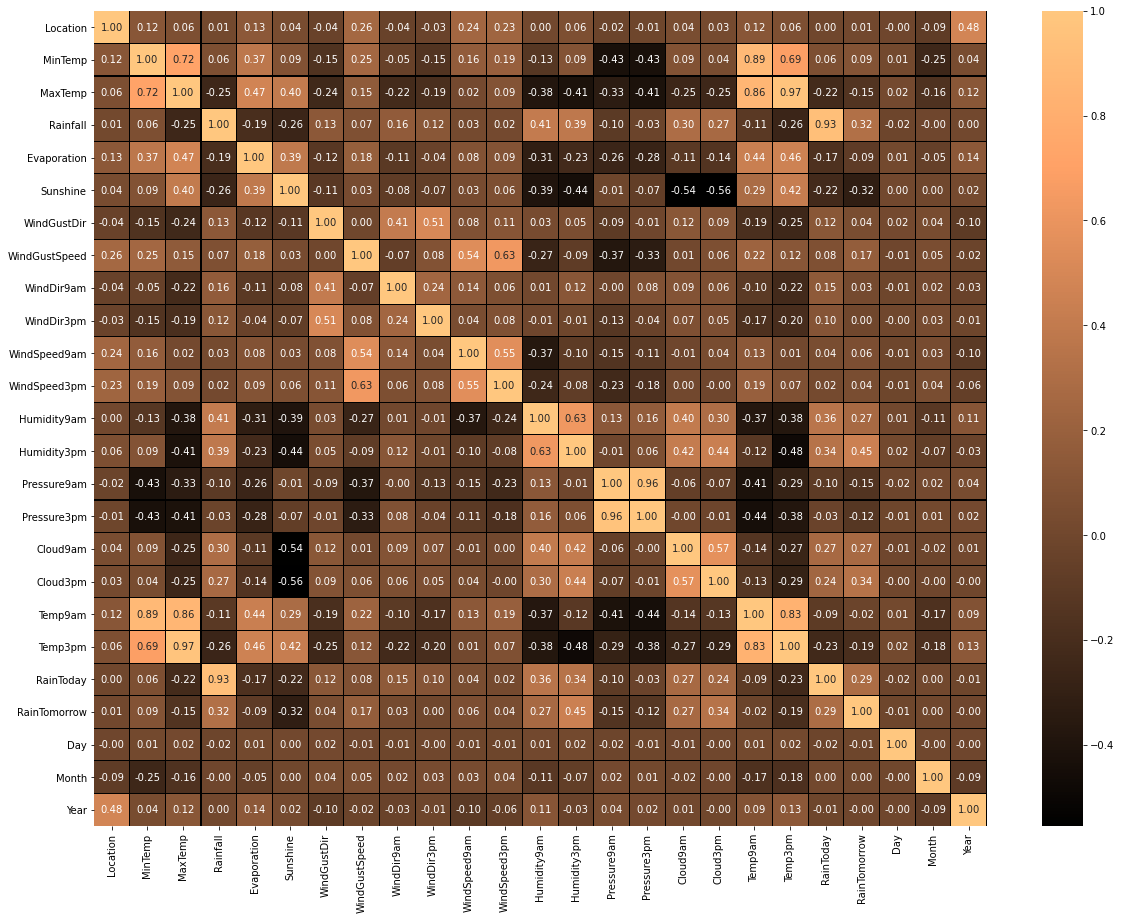

In [60]:
# Visualizing df_RAINFALL.corr() using heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df_RAINFALL.corr(),annot=True,linewidths=0.1,linecolor="black",fmt=".2f",cmap="copper")

From the above correlation heat map, we see that there is very high correlation between the different variables apart from our target variables, this might lead to some multicollinearity problems.

#### RainTomorrow

`Humidity3pm, Cloud3pm, Rainfall & RainToday` are highly positively correlated with `RainTomorrow`. 

`Sunshine & Temp3pm` are highly negatively correlated with `RainTomorrow`.

#### Rainfall

`RainToday, Humidity9am, Humidity3pm, Cloud9am, Cloud3pm & RainTomorrow`, are higly positively correlated with our target `Rainfall`. 

`Temp3pm, Sunshine, MaxTemp & Evaporation` are highly negatively correlated with our target `Rainfall`.

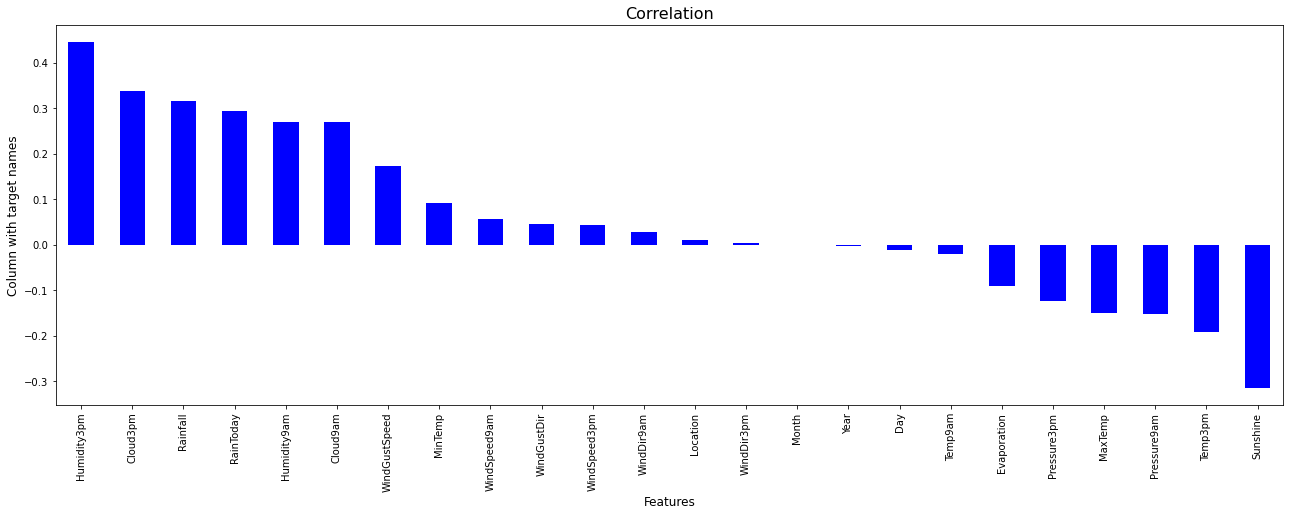

In [61]:
plt.figure(figsize=(22,7))
df_RAINFALL.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot(kind='bar',color='b')
plt.xlabel('Features',fontsize=12)
plt.ylabel('Column with target names',fontsize=12)
plt.title('Correlation',fontsize=16)
plt.show()

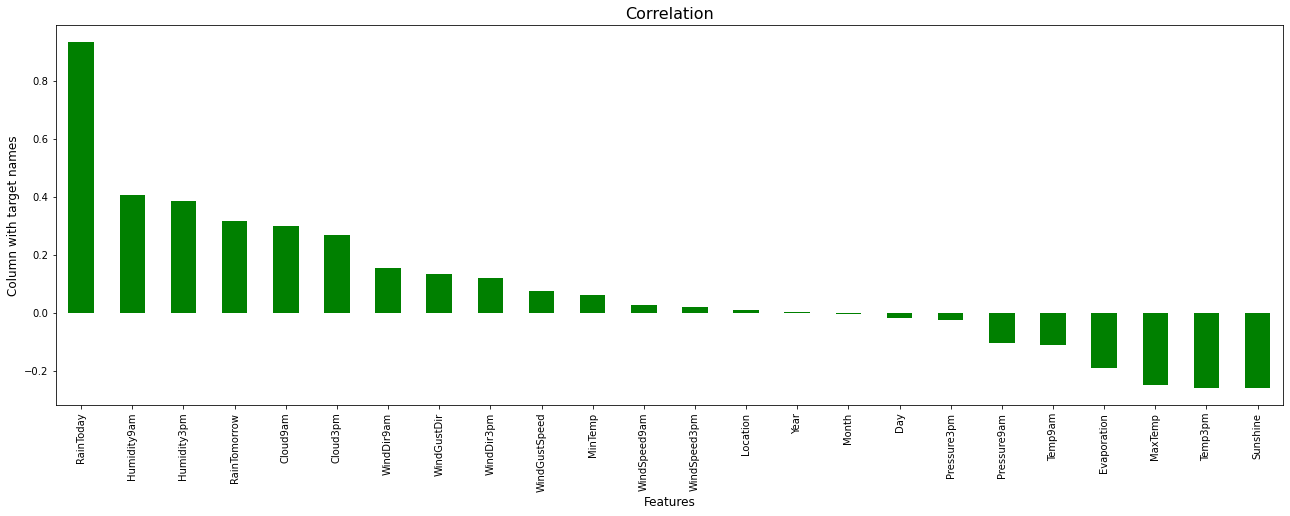

In [62]:
plt.figure(figsize=(22,7))
df_RAINFALL.corr()['Rainfall'].sort_values(ascending=False).drop(['Rainfall']).plot(kind='bar',color='g')
plt.xlabel('Features',fontsize=12)
plt.ylabel('Column with target names',fontsize=12)
plt.title('Correlation',fontsize=16)
plt.show()

The columns `Year & Month` have very less correlation with our target variables.

# Model Building (Regression : "Rainfall")

In [119]:
x = df_RAINFALL.drop("Rainfall", axis=1)
y = df_RAINFALL["Rainfall"]

In [120]:
x.shape

(7987, 24)

In [121]:
y.shape

(7987,)

# Scaling

In [122]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
x = pd.DataFrame(scale.fit_transform(x), columns=x.columns)
x

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,-1.508427,0.056432,-0.145782,0.188308,-0.101924,1.229267,0.433602,1.250245,1.400214,0.784411,...,-1.397105,1.421294,0.012156,-0.138147,-0.098505,-0.542476,-0.543635,-1.671657,1.634113,-1.661315
1,-1.508427,-1.058487,0.220626,0.188308,-0.101924,1.441960,0.433602,-0.277857,1.626597,-0.983424,...,-1.278981,0.021556,0.012156,-0.084302,0.329836,-0.542476,-0.543635,-1.557976,1.634113,-1.661315
2,-1.508427,-0.036478,0.320555,0.188308,-0.101924,1.654654,0.579087,1.250245,1.626597,0.700366,...,-1.127106,0.021556,-1.076263,0.597739,0.141366,-0.542476,-0.543635,-1.444296,1.634113,-1.661315
3,-1.508427,-0.724012,0.703617,0.188308,-0.101924,-0.684977,-1.257283,0.377044,-1.769138,-0.063339,...,-0.435234,0.021556,0.012156,0.077234,0.706776,-0.542476,-0.543635,-1.330616,1.634113,-1.661315
4,-1.508427,0.818294,1.419778,0.188308,-0.101924,1.229267,0.209036,-1.369358,-0.184462,-0.541265,...,-1.582729,1.009606,1.535942,0.023389,1.255052,-0.542476,-0.543635,-1.216936,1.634113,-1.661315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7982,1.029423,-1.913259,-0.062507,0.188308,-0.101924,-1.535751,-0.605818,0.377044,-1.542755,0.146287,...,0.830385,0.021556,0.012156,-1.358641,0.004297,-0.542476,-0.543635,0.601949,-0.123726,2.004134
7983,1.029423,-1.764603,0.253935,0.188308,-0.101924,-0.259589,-1.460139,0.377044,-1.089991,0.146287,...,0.627886,0.021556,0.012156,-1.215054,0.364103,-0.542476,-0.543635,0.715629,-0.123726,2.004134
7984,1.029423,-1.430127,0.520414,0.188308,-0.101924,-0.897670,-0.103544,0.377044,1.400214,-0.290661,...,0.239762,0.021556,0.012156,-0.927879,0.638241,-0.542476,-0.543635,0.829310,-0.123726,2.004134
7985,1.029423,-0.984159,0.537069,0.188308,-0.101924,0.378492,-0.875070,0.595344,-1.089991,0.146287,...,0.189138,-0.637144,-1.076263,-0.461219,0.621108,-0.542476,-0.543635,0.942990,-0.123726,2.004134


# VIF

In [123]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["Features"]=x.columns
vif["VIF"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,Features,VIF
0,Location,1.599532
1,MinTemp,8.831486
2,MaxTemp,26.387815
3,Evaporation,1.562995
4,Sunshine,2.074467
5,WindGustDir,1.620370
6,WindGustSpeed,2.337300
7,WindDir9am,1.363193
8,WindDir3pm,1.489826
9,WindSpeed9am,1.982374


There are high VIF values present in columns : `Temp3pm, MaxTemp, Pressure9am, Pressure3pm & Temp9am`. We shall drop them in ascending order of the VIF scores until Multicollinerarity is within 10.

In [124]:
# Dropping high VIF columns
x.drop("Temp3pm",axis=1,inplace=True)

In [125]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["Features"]=x.columns
vif["VIF"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,Features,VIF
0,Location,1.598744
1,MinTemp,8.791547
2,MaxTemp,9.649537
3,Evaporation,1.562092
4,Sunshine,2.074453
5,WindGustDir,1.617125
6,WindGustSpeed,2.327854
7,WindDir9am,1.362296
8,WindDir3pm,1.488830
9,WindSpeed9am,1.982344


In [126]:
# Dropping high VIF columns
x.drop("Pressure9am",axis=1,inplace=True)

In [127]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["Features"]=x.columns
vif["VIF"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,Features,VIF
0,Location,1.598741
1,MinTemp,8.673642
2,MaxTemp,9.256346
3,Evaporation,1.542066
4,Sunshine,2.064397
5,WindGustDir,1.602276
6,WindGustSpeed,2.302920
7,WindDir9am,1.340079
8,WindDir3pm,1.421249
9,WindSpeed9am,1.979505


In [128]:
# Dropping high VIF columns
x.drop("Temp9am",axis=1,inplace=True)

In [129]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["Features"]=x.columns
vif["VIF"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif

,Features,VIF
0,Location,1.596324
1,MinTemp,4.521155
2,MaxTemp,5.497194
3,Evaporation,1.535630
4,Sunshine,2.054881
5,WindGustDir,1.600389
6,WindGustSpeed,2.266140
7,WindDir9am,1.339947
8,WindDir3pm,1.420910
9,WindSpeed9am,1.956486


We have dealt with the high multicollinearity.

# Best Random State

In [130]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [131]:
maxAccu=0
maxRS=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x, y, test_size = 0.30, random_state = i)
    KNN=neighbors.KNeighborsRegressor()
    KNN.fit(x_train,y_train)
    pred_rs=KNN.predict(x_test)
    r2=r2_score(y_test,pred_rs)
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i
print("Best R2 Score is :",maxAccu," on Random State :",maxRS)

Best R2 Score is : 0.8500158848372519  on Random State : 157


In [132]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [133]:
x_train.shape

(5590, 21)

In [134]:
x_test.shape

(2397, 21)

In [135]:
y_train.shape

(5590,)

In [136]:
y_test.shape

(2397,)

# Linear Regression

In [137]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [138]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

pred_lr=lr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_lr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_lr))
print('Mean squared error: ',mean_squared_error(y_test,pred_lr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_lr)))

R2_Score:  0.8878080589079276
Mean absolute error:  0.21754108969823394
Mean squared error:  0.11374589845184262
Root Mean squared error:  0.33726235848644986


# Decision Tree Regressor

In [139]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)

pred_dtr=dtr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_dtr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_dtr))
print('Mean squared error: ',mean_squared_error(y_test,pred_dtr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2_Score:  0.8528201845342287
Mean absolute error:  0.1554787865643833
Mean squared error:  0.1492183857518933
Root Mean squared error:  0.38628795703709595


# KNearest Neighbors Regressor

In [140]:
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

pred_knn=knn.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_knn))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_knn))
print('Mean squared error: ',mean_squared_error(y_test,pred_knn))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_Score:  0.8500158848372519
Mean absolute error:  0.21707578282832685
Mean squared error:  0.15206152747362434
Root Mean squared error:  0.3899506731288258


# Gradient Boosting Regressor

In [141]:
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)

pred_gbr=gbr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_gbr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_gbr))
print('Mean squared error: ',mean_squared_error(y_test,pred_gbr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_gbr)))

R2_Score:  0.8958069603137431
Mean absolute error:  0.20365207045849162
Mean squared error:  0.10563620520493185
Root Mean squared error:  0.3250172383196495


# Extra Trees Regressor

In [142]:
from sklearn.ensemble import ExtraTreesRegressor

etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
etr.score(x_train,y_train)

pred_etr=etr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_etr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_etr))
print('Mean squared error: ',mean_squared_error(y_test,pred_etr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_etr)))

R2_Score:  0.9260213082461876
Mean absolute error:  0.14859021029138025
Mean squared error:  0.07500336189854823
Root Mean squared error:  0.27386741664270364


# SVR

In [143]:
from sklearn.svm import SVR

svr=SVR()
svr.fit(x_train,y_train)
svr.score(x_train,y_train)

pred_svr=svr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_svr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_svr))
print('Mean squared error: ',mean_squared_error(y_test,pred_svr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_svr)))

R2_Score:  0.8876780453179673
Mean absolute error:  0.1892002042350278
Mean squared error:  0.11387771284472167
Root Mean squared error:  0.3374577200846377


# Random Forest Regressor

In [144]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)

pred_rfr=rfr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_rfr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_rfr))
print('Mean squared error: ',mean_squared_error(y_test,pred_rfr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_rfr)))

R2_Score:  0.9183110924827564
Mean absolute error:  0.17406688055886388
Mean squared error:  0.08282037095224942
Root Mean squared error:  0.28778528619832083


From the above regression models, the highest R2 score belongs to `Extra Trees Regressor`, followed by `Random Forest Regressor, Gradient Boosting Regressor & SVR model`. 

Next, `Linear Regression Model` and `KNearest Neighbors Regressor` & lastly, `Decision Tree Regressor`.

# Cross Validation Score

In [145]:
from sklearn.model_selection import cross_val_score

In [146]:
scr_ln=cross_val_score(lr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_ln.mean())

Cross validation score of this model is:  0.8788649156302213


In [147]:
scr_dtr=cross_val_score(dtr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_dtr.mean())

Cross validation score of this model is:  0.7998522925093026


In [148]:
scr_knn=cross_val_score(knn,x,y,cv=5)
print("Cross validation score of this model is: ",scr_knn.mean())

Cross validation score of this model is:  0.8254297817945535


In [149]:
scr_gbr=cross_val_score(gbr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_gbr.mean())

Cross validation score of this model is:  0.8839380377965416


In [150]:
scr_etr=cross_val_score(etr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_etr.mean())

Cross validation score of this model is:  0.9040044651039956


In [151]:
scr_svr=cross_val_score(svr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_svr.mean())

Cross validation score of this model is:  0.8737790786267468


In [152]:
scr_rfr=cross_val_score(rfr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_rfr.mean())

Cross validation score of this model is:  0.8969783590095736


The highest cross validation score belongs to `Extra Trees Regressor`, followed by `Random Forest Regressor, Gradient Boosting Regressor, SVR Model & Linear Regression Model`.  

Next, `KNearest Neighbors Regressor` and lastly, `Decision Tree Regressor`.

# Saving Regression Model

Since the Highest Cross Validaion Score and Accuracy Score belong to `Extra Trees Regressor`, we shall save this model as our final model.

In [157]:
import joblib
joblib.dump(etr,"Rainfall_Prediction_Regression.pkl")

['Rainfall_Prediction_Regression.pkl']

# Prediction

In [158]:
# Loading the saved model
Rainfall_Regression_Model=joblib.load("Rainfall_Prediction_Regression.pkl")

# Prediction
prediction = Rainfall_Regression_Model.predict(x_test)
prediction

array([-0.65423115,  1.47401538,  0.04256444, ...,  1.87848529,
       -0.40636362,  0.77305836])

In [159]:
pd.DataFrame([Rainfall_Regression_Model.predict(x_test)[:],y_test[:]],index=["Predictions","Original Values"])

,0,1,2,3,4,5,6,7,8,9,...,2387,2388,2389,2390,2391,2392,2393,2394,2395,2396
Predictions,-0.654231,1.474015,0.042564,-0.647283,-0.654231,1.619418,-0.590000,-0.539557,-0.532718,1.737287,...,1.887751,0.172963,-0.532128,-0.654231,-0.619114,-0.592936,1.648641,1.878485,-0.406364,0.773058
Original Values,-0.654231,1.474015,0.040573,-0.654231,-0.654231,1.252337,-0.654231,-0.654231,-0.654231,1.812442,...,1.887751,0.981874,-0.654231,-0.654231,-0.654231,-0.654231,1.522091,1.878485,-0.654231,0.773058


The Predictions and the Original Values are almost similar.

# Model Building (Classification: "RainTomorrow")

In [63]:
df_RAINFALL

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,13.4,22.9,0.773058,0.188308,-0.101924,13,0.433602,13,14,...,1007.1,8.0,4.5,16.9,21.8,0,0,1,12,2008
1,1,7.4,25.1,-0.654231,0.188308,-0.101924,14,0.433602,6,15,...,1007.8,4.6,4.5,17.2,24.3,0,0,2,12,2008
2,1,12.9,25.7,-0.654231,0.188308,-0.101924,15,0.579087,13,15,...,1008.7,4.6,2.0,21.0,23.2,0,0,3,12,2008
3,1,9.2,28.0,-0.654231,0.188308,-0.101924,4,-1.257283,9,0,...,1012.8,4.6,4.5,18.1,26.5,0,0,4,12,2008
4,1,17.5,32.3,1.135607,0.188308,-0.101924,13,0.209036,1,7,...,1006.0,7.0,8.0,17.8,29.7,0,0,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.4,-0.654231,0.188308,-0.101924,0,-0.605818,9,1,...,1020.3,4.6,4.5,10.1,22.4,0,0,21,6,2017
8421,9,3.6,25.3,-0.654231,0.188308,-0.101924,6,-1.460139,9,3,...,1019.1,4.6,4.5,10.9,24.5,0,0,22,6,2017
8422,9,5.4,26.9,-0.654231,0.188308,-0.101924,3,-0.103544,9,14,...,1016.8,4.6,4.5,12.5,26.1,0,0,23,6,2017
8423,9,7.8,27.0,-0.654231,0.188308,-0.101924,9,-0.875070,10,3,...,1016.5,3.0,2.0,15.1,26.0,0,0,24,6,2017


In [64]:
x1 = df_RAINFALL.drop("RainTomorrow",axis=1)
y1 = df_RAINFALL["RainTomorrow"]

In [65]:
x1.shape

(7987, 24)

In [66]:
y1.shape

(7987,)

# Scaling

In [67]:
from sklearn.preprocessing import StandardScaler

scale1 = StandardScaler()
x1 = pd.DataFrame(scale1.fit_transform(x1), columns=x1.columns)
x1

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Day,Month,Year
0,-1.508427,0.056432,-0.145782,0.773058,0.188308,-0.101924,1.229267,0.433602,1.250245,1.400214,...,-1.686019,-1.397105,1.421294,0.012156,-0.138147,-0.098505,-0.542476,-1.671657,1.634113,-1.661315
1,-1.508427,-1.058487,0.220626,-0.654231,0.188308,-0.101924,1.441960,0.433602,-0.277857,1.626597,...,-1.201326,-1.278981,0.021556,0.012156,-0.084302,0.329836,-0.542476,-1.557976,1.634113,-1.661315
2,-1.508427,-0.036478,0.320555,-0.654231,0.188308,-0.101924,1.654654,0.579087,1.250245,1.626597,...,-1.702732,-1.127106,0.021556,-1.076263,0.597739,0.141366,-0.542476,-1.444296,1.634113,-1.661315
3,-1.508427,-0.724012,0.703617,-0.654231,0.188308,-0.101924,-0.684977,-1.257283,0.377044,-1.769138,...,-0.031378,-0.435234,0.021556,0.012156,0.077234,0.706776,-0.542476,-1.330616,1.634113,-1.661315
4,-1.508427,0.818294,1.419778,1.135607,0.188308,-0.101924,1.229267,0.209036,-1.369358,-0.184462,...,-1.167899,-1.582729,1.009606,1.535942,0.023389,1.255052,-0.542476,-1.216936,1.634113,-1.661315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7982,1.029423,-1.913259,-0.062507,-0.654231,0.188308,-0.101924,-1.535751,-0.605818,0.377044,-1.542755,...,1.138569,0.830385,0.021556,0.012156,-1.358641,0.004297,-0.542476,0.601949,-0.123726,2.004134
7983,1.029423,-1.764603,0.253935,-0.654231,0.188308,-0.101924,-0.259589,-1.460139,0.377044,-1.089991,...,0.954720,0.627886,0.021556,0.012156,-1.215054,0.364103,-0.542476,0.715629,-0.123726,2.004134
7984,1.029423,-1.430127,0.520414,-0.654231,0.188308,-0.101924,-0.897670,-0.103544,0.377044,1.400214,...,0.536882,0.239762,0.021556,0.012156,-0.927879,0.638241,-0.542476,0.829310,-0.123726,2.004134
7985,1.029423,-0.984159,0.537069,-0.654231,0.188308,-0.101924,0.378492,-0.875070,0.595344,-1.089991,...,0.269465,0.189138,-0.637144,-1.076263,-0.461219,0.621108,-0.542476,0.942990,-0.123726,2.004134


# VIF

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif1=pd.DataFrame()
vif1["Features"]=x1.columns
vif1["VIF"]=[variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif1

,Features,VIF
0,Location,1.588828
1,MinTemp,8.835953
2,MaxTemp,26.415792
3,Rainfall,8.424683
4,Evaporation,1.568072
5,Sunshine,2.056706
6,WindGustDir,1.617998
7,WindGustSpeed,2.267612
8,WindDir9am,1.363212
9,WindDir3pm,1.491574


There are high VIF values present in columns : `Temp3pm, MaxTemp, Pressure9am, Pressure3pm & Temp9am`. We shall drop them in ascending order of the VIF scores until Multicollinerarity is within 10.

In [69]:
# Dropping high VIF columns
x1.drop("Temp3pm",axis=1,inplace=True)

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif1=pd.DataFrame()
vif1["Features"]=x1.columns
vif1["VIF"]=[variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif1

,Features,VIF
0,Location,1.588058
1,MinTemp,8.796105
2,MaxTemp,9.675628
3,Rainfall,8.424677
4,Evaporation,1.567170
5,Sunshine,2.056688
6,WindGustDir,1.614769
7,WindGustSpeed,2.258334
8,WindDir9am,1.362314
9,WindDir3pm,1.490574


In [71]:
# Dropping high VIF columns
x1.drop("Pressure9am",axis=1,inplace=True)

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif1=pd.DataFrame()
vif1["Features"]=x1.columns
vif1["VIF"]=[variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif1

,Features,VIF
0,Location,1.588038
1,MinTemp,8.677886
2,MaxTemp,9.284263
3,Rainfall,8.409046
4,Evaporation,1.546461
5,Sunshine,2.047853
6,WindGustDir,1.600552
7,WindGustSpeed,2.238591
8,WindDir9am,1.340050
9,WindDir3pm,1.423109


In [73]:
# Dropping high VIF columns
x1.drop("Temp9am",axis=1,inplace=True)

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif1=pd.DataFrame()
vif1["Features"]=x1.columns
vif1["VIF"]=[variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif1

,Features,VIF
0,Location,1.585505
1,MinTemp,4.539243
2,MaxTemp,5.508354
3,Rainfall,8.403283
4,Evaporation,1.540296
5,Sunshine,2.038206
6,WindGustDir,1.598713
7,WindGustSpeed,2.200208
8,WindDir9am,1.339926
9,WindDir3pm,1.422718


Now VIF values are within 10. Multicollinearity is good.

# SMOTE

In [75]:
y1.value_counts()

0    6165
1    1822
Name: RainTomorrow, dtype: int64

In [76]:
from imblearn.over_sampling import SMOTE
sm1 = SMOTE()
x1 , y1 = sm1.fit_resample(x1,y1)

In [77]:
y1.value_counts()

0    6165
1    6165
Name: RainTomorrow, dtype: int64

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

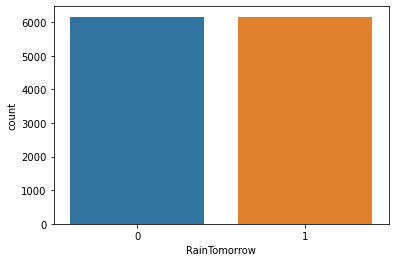

In [78]:
# Visualizing the data after oversampling
sns.countplot(y1)

We have balanced the data using SMOTE.

# Best Random State

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [80]:
maxAccu1=0
maxRS1=0
for i in range(200):
    x1_train,x1_test,y1_train,y1_test=train_test_split(x1, y1, test_size = 0.30, random_state = i)
    lgr=LogisticRegression()
    lgr.fit(x1_train,y1_train)
    pred_rs=lgr.predict(x1_test)
    acc=accuracy_score(y1_test,pred_rs)
    if acc>maxAccu1:
        maxAccu1=acc
        maxRS1=i
print("Best accuracy is :",maxAccu1," on Random State :",maxRS1)

Best accuracy is : 0.7891321978913219  on Random State : 71


In [81]:
# dividing the dataset for training and testing
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1, y1, test_size = 0.30, random_state = maxRS1)

In [82]:
x1_train.shape

(8631, 21)

In [83]:
y1_train.shape

(8631,)

In [84]:
x1_test.shape

(3699, 21)

In [85]:
y1_test.shape

(3699,)

In [86]:
# scaling the data using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
x1_train = sc1.fit_transform(x1_train)
x1_test = sc1.fit_transform(x1_test)

# Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [88]:
lg=LogisticRegression()
lg.fit(x1_train, y1_train)
lg.score(x1_train, y1_train)
pred_lg=lg.predict(x1_test)

print("accuracy score: ",accuracy_score(y1_test,pred_lg))
print(confusion_matrix(y1_test,pred_lg))
print(classification_report(y1_test,pred_lg))

accuracy score:  0.7888618545552852
[[1480  400]
 [ 381 1438]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1880
           1       0.78      0.79      0.79      1819

    accuracy                           0.79      3699
   macro avg       0.79      0.79      0.79      3699
weighted avg       0.79      0.79      0.79      3699



# Decision Tree Classifier

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
dtc=DecisionTreeClassifier()
dtc.fit(x1_train,y1_train)
dtc.score(x1_train,y1_train)
pred_dtc=dtc.predict(x1_test)

print("accuracy score: ",accuracy_score(y1_test,pred_dtc))
print(confusion_matrix(y1_test,pred_dtc))
print(classification_report(y1_test,pred_dtc))

accuracy score:  0.7007299270072993
[[ 969  911]
 [ 196 1623]]
              precision    recall  f1-score   support

           0       0.83      0.52      0.64      1880
           1       0.64      0.89      0.75      1819

    accuracy                           0.70      3699
   macro avg       0.74      0.70      0.69      3699
weighted avg       0.74      0.70      0.69      3699



# KNearest Neighbors Classifier

In [91]:
from sklearn.neighbors import KNeighborsClassifier

In [92]:
knc=KNeighborsClassifier(n_neighbors = 5)
knc.fit(x1_train,y1_train)
knc.score(x1_train,y1_train)
pred_knc=knc.predict(x1_test)

print("accuracy score: ",accuracy_score(y1_test,pred_knc))
print(confusion_matrix(y1_test,pred_knc))
print(classification_report(y1_test,pred_knc))

accuracy score:  0.8564476885644768
[[1413  467]
 [  64 1755]]
              precision    recall  f1-score   support

           0       0.96      0.75      0.84      1880
           1       0.79      0.96      0.87      1819

    accuracy                           0.86      3699
   macro avg       0.87      0.86      0.86      3699
weighted avg       0.87      0.86      0.85      3699



# SVC

In [93]:
from sklearn.svm import SVC

In [94]:
svc = SVC()
svc.fit(x1_train, y1_train)
svc.score(x1_train, y1_train)
svc_pred = svc.predict(x1_test)
print("accuracy score: ",accuracy_score(y1_test,svc_pred))
print(confusion_matrix(y1_test,svc_pred))
print(classification_report(y1_test,svc_pred))

accuracy score:  0.8645579886455799
[[1557  323]
 [ 178 1641]]
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      1880
           1       0.84      0.90      0.87      1819

    accuracy                           0.86      3699
   macro avg       0.87      0.87      0.86      3699
weighted avg       0.87      0.86      0.86      3699



# Random Forest Classifier

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
rfc=RandomForestClassifier()
rfc.fit(x1_train,y1_train)
rfc.score(x1_train,y1_train)
pred_rfc=rfc.predict(x1_test)

print("accuracy score: ",accuracy_score(y1_test,pred_rfc))
print(confusion_matrix(y1_test,pred_rfc))
print(classification_report(y1_test,pred_rfc))

accuracy score:  0.8807785888077859
[[1486  394]
 [  47 1772]]
              precision    recall  f1-score   support

           0       0.97      0.79      0.87      1880
           1       0.82      0.97      0.89      1819

    accuracy                           0.88      3699
   macro avg       0.89      0.88      0.88      3699
weighted avg       0.89      0.88      0.88      3699



# Gradient Boosting Classifier

In [97]:
from sklearn.ensemble import GradientBoostingClassifier

In [98]:
gbc=GradientBoostingClassifier()
gbc.fit(x1_train,y1_train)
gbc.score(x1_train,y1_train)
pred_gcb=gbc.predict(x1_test)

print("accuracy score: ",accuracy_score(y1_test,pred_gcb))
print(confusion_matrix(y1_test,pred_gcb))
print(classification_report(y1_test,pred_gcb))

accuracy score:  0.6920789402541228
[[ 797 1083]
 [  56 1763]]
              precision    recall  f1-score   support

           0       0.93      0.42      0.58      1880
           1       0.62      0.97      0.76      1819

    accuracy                           0.69      3699
   macro avg       0.78      0.70      0.67      3699
weighted avg       0.78      0.69      0.67      3699



# Extra Trees Classifier

In [99]:
from sklearn.ensemble import ExtraTreesClassifier

In [100]:
etc=ExtraTreesClassifier()
etc.fit(x1_train,y1_train)
etc.score(x1_train,y1_train)
pred_etc=etc.predict(x1_test)

print("accuracy score: ",accuracy_score(y1_test,pred_etc))
print(confusion_matrix(y1_test,pred_etc))
print(classification_report(y1_test,pred_etc))

accuracy score:  0.9456609894566099
[[1736  144]
 [  57 1762]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.95      1880
           1       0.92      0.97      0.95      1819

    accuracy                           0.95      3699
   macro avg       0.95      0.95      0.95      3699
weighted avg       0.95      0.95      0.95      3699



From the above classification models, the highest accuracy score belongs to `Extra Trees Classifier`, followed by `Random Forest Classifier, SVC Model & KNearest Neighbors Classifier`.

Next, `Logistic Regression Model`, followed by `Decision Tree CLassifier` & lastly, `Gradient Boosting CLassifier`.

# Cross Validation Score

In [101]:
from sklearn.model_selection import cross_val_score

In [102]:
scr_lg=cross_val_score(lg,x1,y1,cv=5)
print("Cross validation score of this model is: ",scr_lg.mean())

Cross validation score of this model is:  0.7145985401459855


In [103]:
scr_dtc=cross_val_score(dtc,x1,y1,cv=5)
print("Cross validation score of this model is: ",scr_dtc.mean())

Cross validation score of this model is:  0.7034063260340633


In [104]:
scr_knc=cross_val_score(knc,x1,y1,cv=5)
print("Cross validation score of this model is: ",scr_knc.mean())

Cross validation score of this model is:  0.7227899432278995


In [105]:
scr_svc=cross_val_score(svc,x1,y1,cv=5)
print("Cross validation score of this model is: ",scr_svc.mean())

Cross validation score of this model is:  0.735036496350365


In [106]:
scr_rfc=cross_val_score(rfc,x1,y1,cv=5)
print("Cross validation score of this model is: ",scr_rfc.mean())

Cross validation score of this model is:  0.7779399837793999


In [107]:
scr_gbc=cross_val_score(gbc,x1,y1,cv=5)
print("Cross validation score of this model is: ",scr_gbc.mean())

Cross validation score of this model is:  0.6811841038118411


In [108]:
scr_etc=cross_val_score(etc,x1,y1,cv=5)
print("Cross validation score of this model is: ",scr_etc.mean())

Cross validation score of this model is:  0.7920519059205191


The highest cross validation scorebelongs to `Extra Trees Classifier`, followed by `Random Forest Classifier, SVC Model, KNearest Neighbors Classifier, Decision Tree Classifier, Logistic Regression Model` & lastly, `Gradient Boosting Classifier`.

# Hyper Parameter Tuning

SInce the crosss validation and Accuracy score of `Extra Trees Classifier` are both the highest among others we shall consider that for hyper parameter tuning. We will use GridSearchCV for hyper parameter tuning.

In [109]:
from sklearn.model_selection import GridSearchCV

In [110]:
parameters_ETC = {'criterion' : ['gini','entropy'],
                  'max_depth' : [10, 20],
                  'n_jobs' : [-2, -1],
                  'n_estimators' : [100, 200, 1000]}
grid_etc=GridSearchCV(etc, param_grid = parameters_ETC, cv = 10)

In [111]:
grid_etc.fit(x1_train, y1_train)

GridSearchCV(cv=10, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20],
                         'n_estimators': [100, 200, 1000], 'n_jobs': [-2, -1]})

In [112]:
grid_etc.best_params_

{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 1000, 'n_jobs': -2}

In [113]:
rain_tmrw_model = ExtraTreesClassifier(criterion='gini',max_depth=20,n_jobs=-2,n_estimators=1000)
rain_tmrw_model.fit(x1_train,y1_train)
pred_rain_tmrw=rain_tmrw_model.predict(x1_test)

print("accuracy score: ",accuracy_score(y1_test,pred_rain_tmrw))
print(confusion_matrix(y1_test,pred_rain_tmrw))
print(classification_report(y1_test,pred_rain_tmrw))

accuracy score:  0.9416058394160584
[[1726  154]
 [  62 1757]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      1880
           1       0.92      0.97      0.94      1819

    accuracy                           0.94      3699
   macro avg       0.94      0.94      0.94      3699
weighted avg       0.94      0.94      0.94      3699



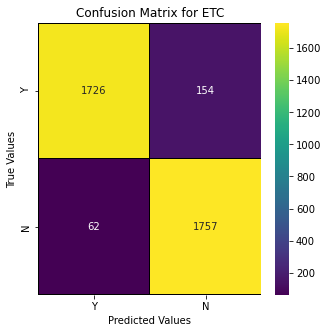

In [114]:
cm = confusion_matrix(y1_test, pred_rain_tmrw)

x_axis_labels = ["Y","N"]
y_axis_labels = ["Y","N"]

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="viridis",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title('Confusion Matrix for ETC')
plt.show()

# ROC-AUC Curve

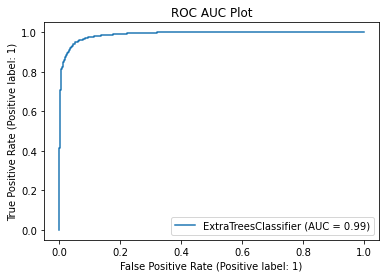

In [115]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rain_tmrw_model,x1_test,y1_test)
plt.title("ROC AUC Plot")
plt.show()

AUC score is `99 %`.

# Saving the Model

In [116]:
import joblib
joblib.dump(rain_tmrw_model,"Rainfall_Prediction_Classification.pkl")

['Rainfall_Prediction_Classification.pkl']

# Prediction

In [117]:
# Loading the saved model
Rainfall_Classification_Model=joblib.load("Rainfall_Prediction_Classification.pkl")

#Prediction
predictions = Rainfall_Classification_Model.predict(x1_test)
predictions

array([1, 1, 0, ..., 1, 1, 0])

In [118]:
pd.DataFrame([Rainfall_Classification_Model.predict(x1_test)[:],y1_test[:]],index=["Predictions","Original Values"])

,0,1,2,3,4,5,6,7,8,9,...,3689,3690,3691,3692,3693,3694,3695,3696,3697,3698
Predictions,1,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,1,1,0
Original Values,1,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,1,0,1,1,0


The predictions and original values are almost similar.